In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())
import re
import datetime

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
sns.set(palette="bright")
sns.set_style("whitegrid")

from sklearn import linear_model
from cycler import cycler
from celluloid import Camera

from IPython.display import HTML

import importlib

#importlib.reload(some_module)


import warnings

import numpy as np
import pandas as pd
import copy
import random


from tslib.src import tsUtils
from tslib.tests import testdata

#warnings.filterwarnings(action='once')

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import hdbscan
import plotly.figure_factory as ff
%matplotlib inline
import json


In [3]:
from filter_data import *

#global settings for graphs        
cc = (cycler(linestyle=['-', '--', '-.',':']) * cycler(color=list('brgcmyk')))
plt.rc('lines', linewidth=2)
plt.rc('axes', prop_cycle=cc)
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8.0, 6.0)

plt.rcParams["animation.html"] = "html5"

C:\Users\wangy\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from load_and_clean import *

#update_data()

us = load_clean('NYTimes US')
uscases, usdeaths, usstates = load_clean('NYTimes states')
uscounties_cases, uscounties_deaths, uscounties = load_clean('NYTimes counties')
global_cases, global_deaths = load_clean('JHU global')
us_covid_jhu_cases, us_covid_jhu_deaths = load_clean('JHU US')
mobility_data_apple, mobility_data_google, google_social = load_clean('mobility')
sd_data = load_clean('IHME intervention')
all_population, us_population, usstates_population, uscounties_population = load_clean('population')

uscases_pop_adjusted, usdeaths_pop_adjusted = create_population_adjusted_data(uscases, all_population), \
                                    create_population_adjusted_data(usdeaths, all_population, show_exception = True)
global_cases_pop_adjusted, global_deaths_pop_adjusted = create_population_adjusted_data(global_cases, all_population), \
                                    create_population_adjusted_data(global_deaths, all_population, show_exception = True)

uscounties_cases_pop_adjusted = create_population_adjusted_data(uscounties_cases, all_population, show_exception = True, county = True)
uscounties_deaths_pop_adjusted = create_population_adjusted_data(uscounties_deaths, all_population, county = True)

state_reopen = load_clean('state reopen')
#fips_df = pd.read_csv("../COVID/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")

These countries/region do not have population data ['Virgin Islands']
These countries/region do not have population data ['Bahamas', 'Burma', 'Cabo Verde', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Diamond Princess', 'Eswatini', 'Gambia', 'Holy See', 'Kyrgyzstan', 'MS Zaandam', 'North Macedonia', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Slovakia', 'Syria', 'Taiwan*', 'West Bank and Gaza', 'Western Sahara']
These countries/region do not have population data ['Adjuntas-Puerto Rico', 'Aguada-Puerto Rico', 'Aguadilla-Puerto Rico', 'Aguas Buenas-Puerto Rico', 'Aibonito-Puerto Rico', 'Anasco-Puerto Rico', 'Anchorage-Alaska', 'Arecibo-Puerto Rico', 'Arroyo-Puerto Rico', 'Barceloneta-Puerto Rico', 'Barranquitas-Puerto Rico', 'Bayamon-Puerto Rico', 'Cabo Rojo-Puerto Rico', 'Caguas-Puerto Rico', 'Camuy-Puerto Rico', 'Canovanas-Puerto Rico', 'Carolina-Puerto Rico', 'Catano-Puerto Rico', 'Cayey-Puerto Rico', 'Ceiba-Puerto Rico', 'Ciales-Puerto

In [5]:
#Filter data (this part might be overlapping some cells, but it should contain most of the varilables that are analyzed. )
# This part might be to split and explain
# This part might be to split and explain
t = 7
column = list(mobility_data_google.columns).index('retail_and_recreation_percent_change_from_baseline')
global_deaths_filtered = create_filtered_data(global_deaths, 500 )
#the last column of social distancing dataset is the last social distancing measure used by a location
educational_distancing = get_social_distancing(sd_data, sd_data.columns[-1])

all_data = pd.concat([global_deaths, usdeaths, uscounties_deaths], axis=1).dropna()
all_data_daily = create_rolling_data(all_data, t)

all_data_cases = pd.concat([global_cases, uscases, uscounties_cases], axis=1).dropna()
all_data_cases_daily = create_rolling_data(all_data_cases, t)

all_cases_data_pop = pd.concat([uscases_pop_adjusted,global_cases_pop_adjusted, uscounties_cases_pop_adjusted], axis = 1).dropna()
all_cases_data_pop_daily = create_rolling_data(all_cases_data_pop, t)

all_death_data_pop = pd.concat([usdeaths_pop_adjusted,global_deaths_pop_adjusted, uscounties_deaths_pop_adjusted], axis = 1).dropna()
all_death_data_pop_daily = create_rolling_data(all_death_data_pop, t)

_, daily_global, intervention_date_global = create_intervention_adjusted_data(global_deaths, educational_distancing, t)
_, daily_us, intervention_date_us = create_intervention_adjusted_data(usdeaths, educational_distancing, t)
_, daily_uscounties, intervention_date_uscounties = create_intervention_adjusted_data(uscounties_deaths, educational_distancing, t)

cases_intervention_adjusted, cases_intervention_adjusted_daily, intervention_date_case = create_intervention_adjusted_data(all_data_cases, educational_distancing, t)
deaths_intervention_adjusted, deaths_intervention_adjusted_daily, intervention_date_death = create_intervention_adjusted_data(all_data, educational_distancing, t)

all_cases_data_pop_adjusted, all_cases_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_cases_data_pop, educational_distancing, t)
all_death_data_pop_adjusted, all_death_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_death_data_pop, educational_distancing, t)


last date
Exceptions are []


In [7]:
masks_mandated = ['New York', 'Maine', 'Maryland', 'Virginia', 'New Mexico', 'California', 'Michigan', 'Illinois', 'Massachusetts','Delaware', 'Rhode Island']
masks_recommended = ['Montana', 'Idaho', 'Utah', 'Arizona', 'North Dakota', 'South Dakota', 'Kansas', 'Oklahoma', 
                     'Texas', 'North Carolina', 'South Carolina', 'West Virginia', 'Wisconsin','Iowa', 'Missouri', 'Alaska']
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
   'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
   'Poland', 'Portugal', 'Romania', 'Slovenia', 'Spain', 'Sweden']

northeast = ["Connecticut","Maine","Massachusetts","New Hampshire",
             "Rhode Island","Vermont","New Jersey","New York",
             "Pennsylvania", "Delaware","District of Columbia","Maryland"]
midwest = ["Indiana","Illinois","Michigan","Ohio","Wisconsin",
             "Iowa","Kansas","Minnesota","Missouri","Nebraska",
             "North Dakota","South Dakota"]
south = ["Florida","Georgia",
            "North Carolina","South Carolina","Virginia",
            "West Virginia","Alabama","Kentucky","Mississippi",
            "Tennessee","Arkansas","Louisiana","Oklahoma","Texas"]

west= ["Arizona","Colorado","Idaho","New Mexico","Montana",
            "Utah","Nevada","Wyoming","Alaska","California",
            "Hawaii","Oregon","Washington"]

california_rollback = ["Fresno-California", "Imperial-California", "Kern-California", "Kings-California", "Los Angeles-California", "San Joaquin-California" , "Tulare-California",
                      "Riverside-California", "Sacramento-California", "San Bernardino-California", "Santa Barbara-California", "Santa Clara-California", "Contra Costa-California", "Stanislaus-California", 
                       "Ventura-California"]

google_counties = ['San Mateo-California', 'San Francisco-California', 'Santa Clara-California']

In [8]:
group_a = eu_countries
group_b = ['US']

group_a_label = "EU"
group_b_label = "US"


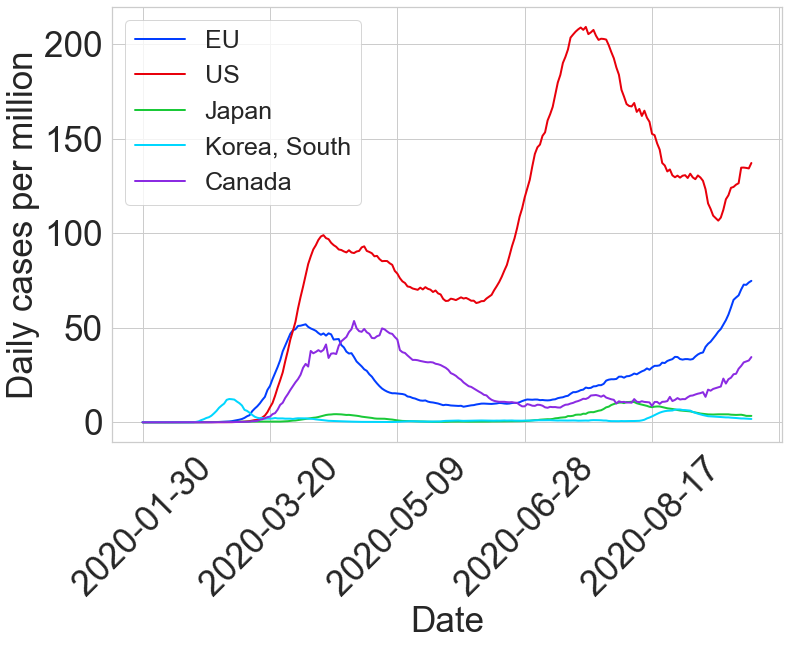

In [7]:
plt.rcParams['figure.figsize'] = (12, 8)
FONTSIZE = 35
dfplot = all_cases_data_pop_daily# all_data_cases_daily

dfplot[group_a].mean(axis=1).plot(label=group_a_label), dfplot[group_b].mean(axis=1).plot(label=group_b_label), 
dfplot['Japan'].plot(), dfplot['Korea, South'].plot(), dfplot['Canada'].plot(), plt.legend(),
plt.xticks(rotation=45,fontsize = FONTSIZE), plt.xlabel('Date', fontsize = FONTSIZE), plt.ylabel('Daily cases per million',fontsize = FONTSIZE)#, plt.title('Cases')
plt.yticks(fontsize = FONTSIZE)
plt.legend(fontsize = 25, loc='upper left')

plt.savefig('../Figures/COVID/Global_cases.pdf', bbox_inches='tight')


In [3]:
groups = [northeast, west, south, midwest]
group_labels = ["North East", "West", "South", "Midwest"]
southwest = south+west

NameError: name 'northeast' is not defined

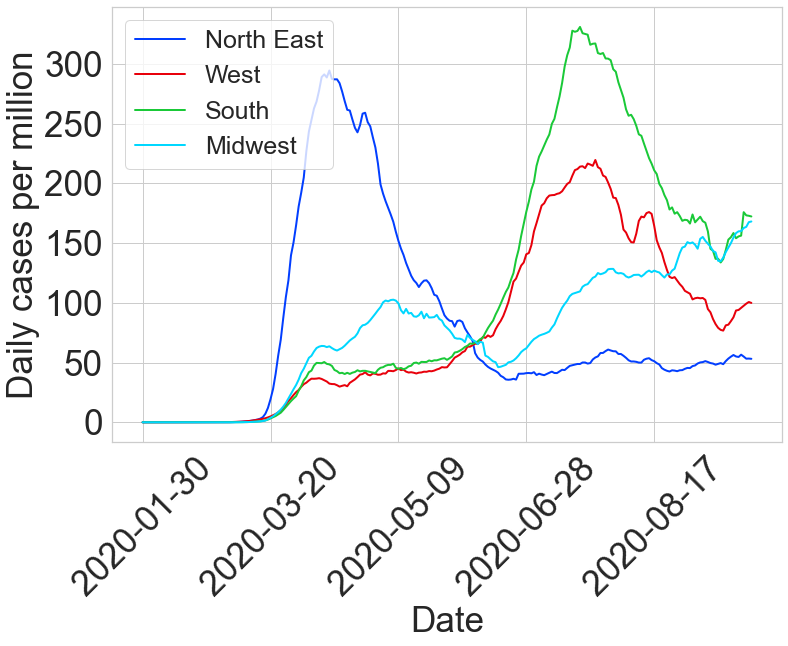

In [9]:
plt.rcParams['figure.figsize'] = (12, 8)
FONTSIZE = 35

dfplot=all_data_cases_daily
i=0
for group in groups:
    (1000000*dfplot[group].sum(axis=1)/(all_population[all_population.index.isin(group)].value.sum())).plot(label=group_labels[i])
    plt.xticks(rotation=45, fontsize = FONTSIZE), plt.ylabel('Daily cases per million', fontsize = FONTSIZE), plt.xlabel('Date' , fontsize = FONTSIZE)#, plt.title('Cases'),
    plt.yticks(fontsize = FONTSIZE)
    plt.legend(fontsize = 25, loc='upper left')
    i=i+1

plt.savefig('../Figures/COVID/US_cases.pdf', bbox_inches='tight')


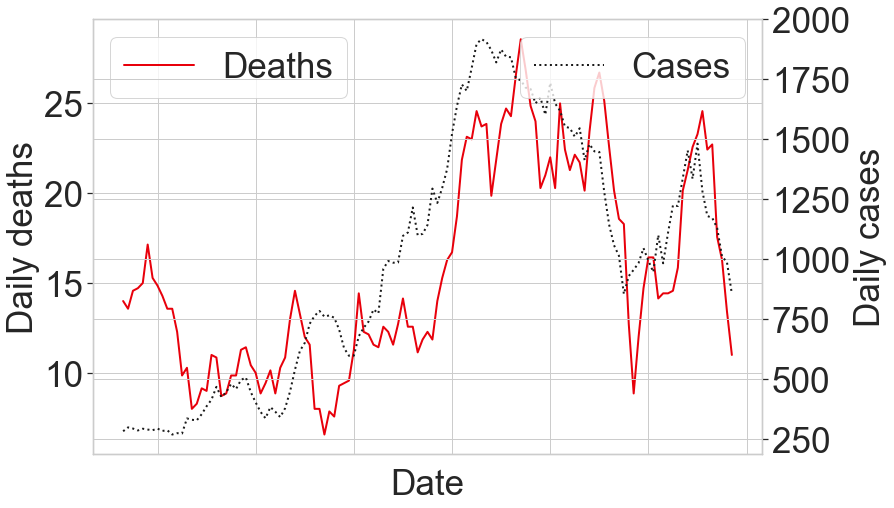

In [10]:
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = (12.0, 8.0)


target ='Alabama'

#FONTSIZE = 36

deaths_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax, color='r', label='Deaths')
#plt.legend()
plt.ylabel('Daily deaths', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)
plt.yticks(fontsize = FONTSIZE)
plt.legend(fontsize = FONTSIZE , loc = 'upper left')
#ax.set_xticks([])
ax.axes.xaxis.set_ticklabels([])


ax2 = ax.twinx()
ax2.set_ylabel('Cases')
cases_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax2, secondary_y=True, color='k',linestyle=":", label='Cases')
#plt.legend()
plt.ylabel('Daily cases', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)

plt.legend(fontsize = FONTSIZE , loc = 'upper right')
plt.yticks(fontsize = FONTSIZE)
#ax2.set_xticks([])
ax2.axes.xaxis.set_ticklabels([])

plt.savefig('../Figures/COVID/'+target+'_deaths_cases.pdf', bbox_inches='tight')

plt.show()

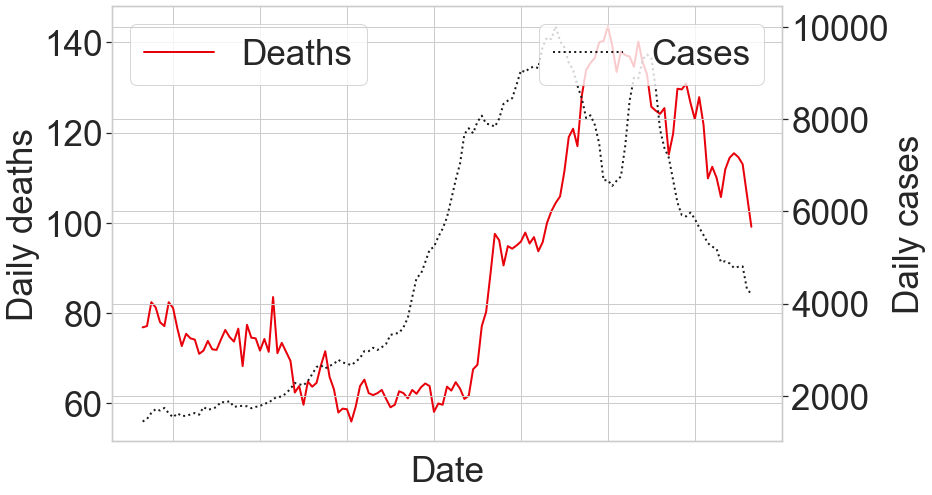

In [11]:
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = (12.0, 8.0)


target ='California'

#FONTSIZE = 36

deaths_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax, color='r', label='Deaths')
#plt.legend()
plt.ylabel('Daily deaths', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)
plt.yticks(fontsize = FONTSIZE)
plt.legend(fontsize = FONTSIZE , loc = 'upper left')
#ax.set_xticks([])
ax.axes.xaxis.set_ticklabels([])


ax2 = ax.twinx()
ax2.set_ylabel('Cases')
cases_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax2, secondary_y=True, color='k',linestyle=":", label='Cases')
#plt.legend()
plt.ylabel('Daily cases', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)

plt.legend(fontsize = FONTSIZE , loc = 'upper right')
plt.yticks(fontsize = FONTSIZE)
#ax2.set_xticks([])
ax2.axes.xaxis.set_ticklabels([])

plt.savefig('../Figures/COVID/'+target+'_deaths_cases.pdf', bbox_inches='tight')

plt.show()

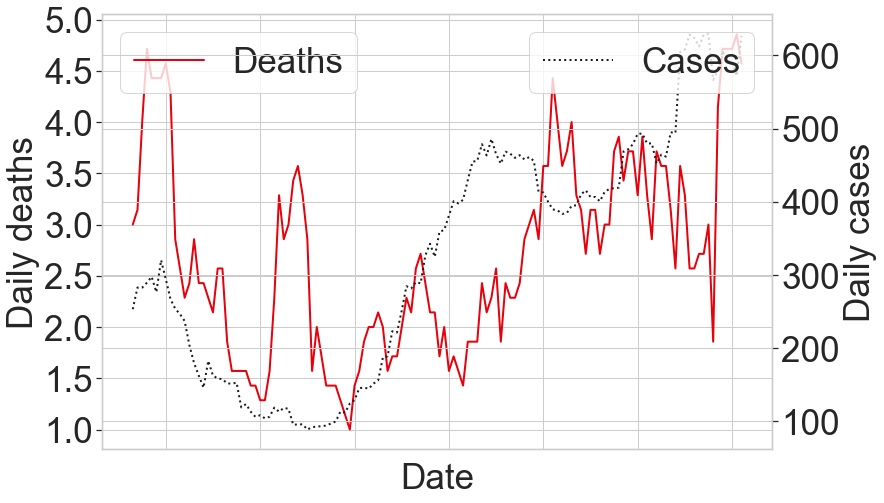

In [12]:
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = (12.0, 8.0)


target ='Kansas'

#FONTSIZE = 36

deaths_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax, color='r', label='Deaths')
#plt.legend()
plt.ylabel('Daily deaths', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)
plt.yticks(fontsize = FONTSIZE)
plt.legend(fontsize = FONTSIZE , loc = 'upper left')
#ax.set_xticks([])
ax.axes.xaxis.set_ticklabels([])


ax2 = ax.twinx()
ax2.set_ylabel('Cases')
cases_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax2, secondary_y=True, color='k',linestyle=":", label='Cases')
#plt.legend()
plt.ylabel('Daily cases', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)

plt.legend(fontsize = FONTSIZE , loc = 'upper right')
plt.yticks(fontsize = FONTSIZE)
#ax2.set_xticks([])
ax2.axes.xaxis.set_ticklabels([])

plt.savefig('../Figures/COVID/'+target+'_deaths_cases.pdf', bbox_inches='tight')

plt.show()

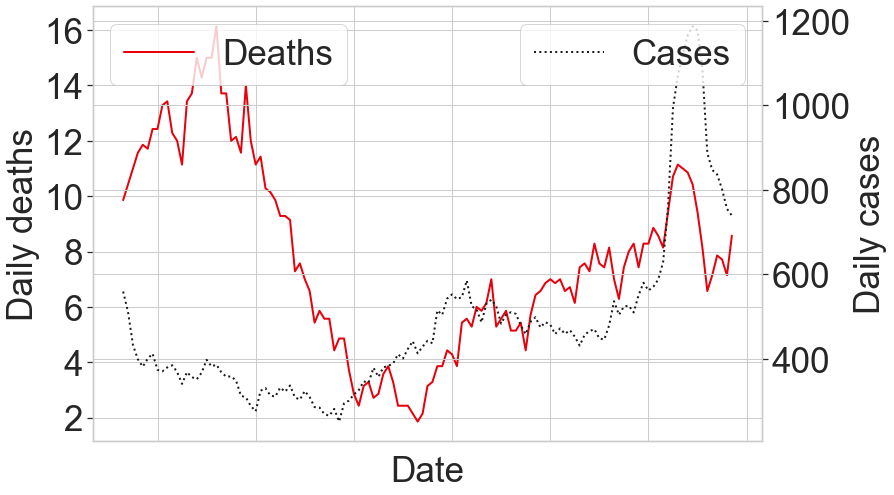

In [13]:
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = (12.0, 8.0)


target ='Iowa'


deaths_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax, color='r', label='Deaths')
#plt.legend()
plt.ylabel('Daily deaths', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)
plt.yticks(fontsize = FONTSIZE)
plt.legend(fontsize = FONTSIZE , loc = 'upper left')
#ax.set_xticks([])
ax.axes.xaxis.set_ticklabels([])


ax2 = ax.twinx()
ax2.set_ylabel('Cases')
cases_intervention_adjusted_daily[target].iloc[25:].plot(ax = ax2, secondary_y=True, color='k',linestyle=":", label='Cases')
#plt.legend()
plt.ylabel('Daily cases', fontsize = FONTSIZE ), plt.xlabel('Date',fontsize = FONTSIZE)

plt.legend(fontsize = FONTSIZE , loc = 'upper right')
plt.yticks(fontsize = FONTSIZE)
#ax2.set_xticks([])
ax2.axes.xaxis.set_ticklabels([])

plt.savefig('../Figures/COVID/'+target+'_deaths_cases.pdf', bbox_inches='tight')

plt.show()

In [14]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.rcParams.update({'font.size': 8})

global_deaths_filtered = create_filtered_data(global_deaths, 100 )

sizes = global_deaths_filtered.apply(pd.Series.last_valid_index)
  
low_thresh=35
threshold=50
donorlpool = list(sizes[sizes>threshold].index)
prediction_states = list(sizes[(sizes>low_thresh) & (sizes<threshold)].index)



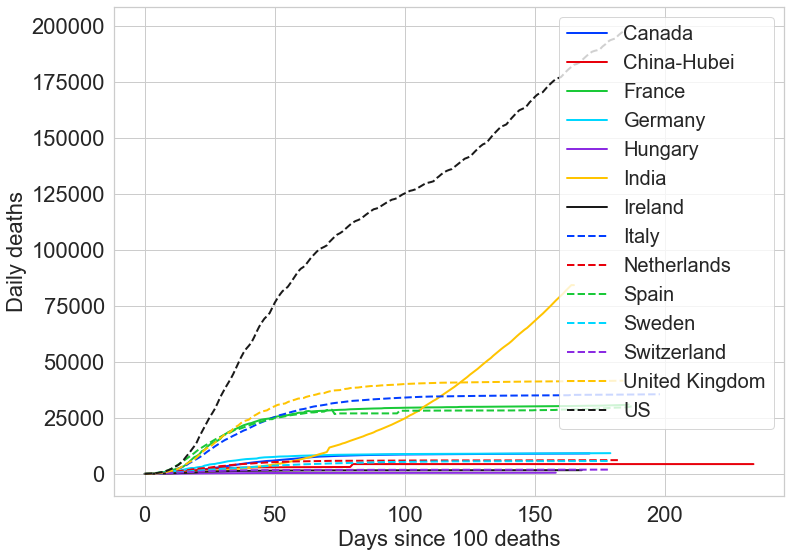

In [15]:
FONTSIZE = 22
fig, ax = plt.subplots()

#group = ['Algeria','Austria', 'Belgium', 'Brazil','Canada-Ontario','Canada-Quebec','China-Hubei','Colombia', 'Czechia', 'Denmark','Ecuador','Egypt','France', 'Germany', 'Hungary', 'India', 'Ireland', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom','US']
group = ['Canada','China-Hubei','France', 'Germany', 'Hungary', 'India', 'Ireland', 'Italy', 'Netherlands', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom','US']

plt.rcParams['figure.figsize'] = (16.0, 8.0)
#plt.xlim([0,60])
global_deaths_filtered[group].plot(ax = ax,grid=True), plt.xlabel('Days since 100 deaths', fontsize = FONTSIZE), plt.ylabel('Daily deaths', fontsize = FONTSIZE)
plt.xticks(fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE)
plt.legend(fontsize = 20)
#plt.xlim(xmax = 200)
#plt.xticks([0,50,100,150,200])

plt.savefig('../Figures/COVID/aligned_100deaths.pdf', bbox_inches='tight')


FONTSIZE = 35

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



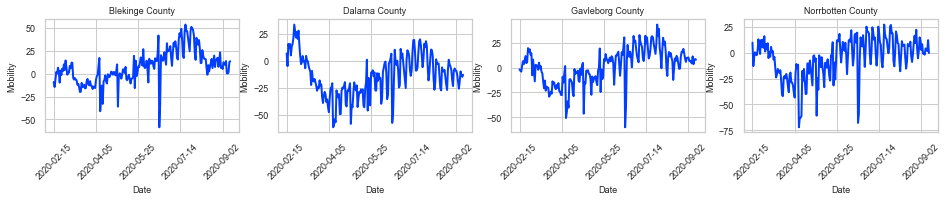

In [16]:
state_list = ['Blekinge County', 'Dalarna County', 'Gavleborg County', 'Norrbotten County']
plt.rcParams['figure.figsize'] = (16,32)

FONTSIZE = 9

#tick_spacing = 30
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#plt.setp( ax.get_xticklabels(), visible=False)

mobility_us = mobility_data_google.loc[mobility_data_google.country_region == 
                                       "Sweden"].pivot_table(index='date', values=mobility_data_google.columns[column], columns='sub_region_1')
#fig, ax = plt.subplots(4)
for i in range(4):


    ax = plt.subplot(13,4, i+1)
    #plt.setp( ax.get_xticklabels(), visible=False)

    #plt.xticks(rotation=45)

    mobility_us[state_list[i]].plot(ax=ax )
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

    #ax.tick_params(axis='x', rotation=45)
    plt.xlabel('Date',fontsize = FONTSIZE), plt.ylabel('Mobility',fontsize = FONTSIZE), plt.xticks(fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE), plt.title(state_list[i], fontsize = FONTSIZE)


    
plt.savefig('../Figures/COVID/Swedish Counties.pdf', bbox_inches='tight')

plt.show()


In [26]:
df = deaths_intervention_adjusted_daily
df = df[df.columns[(df>10).any()]].copy()
lambdas=[1,0.01]
df1 = cases_intervention_adjusted_daily[df.columns].iloc[15:,:].copy()

#targets = [ 'New York', 'Illinois', 'Belgium', 'Switzerland', 'New Jersey', 'France', 'Italy', 'United Kingdom']# 'Ohio', 'Sweden']
#targets = newdf.columns
high_thresh = 55
low_thresh = 50
#targets = random.sample(list(deaths_intervention_adjusted_daily.columns),80)
targets = df.columns
sizes = df[targets].apply(pd.Series.last_valid_index)
targets = sizes[sizes>=low_thresh].index


donorpool = sizes[sizes>=high_thresh].index


print(targets)
print(donorpool)
singVals = 3
weight_features = []
move_intervention = 10
for target in targets:
  
    try:
        newdata = synth_control_predictions([df, df1],high_thresh, low_thresh,
                                            "Deaths Data", singVals, ylimit=[], savePlots=False, do_only=[target], showstates=10,
                               exclude=[], svdSpectrum=False, silent=True, showDonors=False, showPlots=False, lambdas=lambdas, mRSC=False, error_thresh = 1)
        weight_features.append(newdata[0].model_weights())
    except ValueError:
        print(target)
        continue
feature_list = pd.DataFrame((weight_features))
feature_list.index=targets
feature_list.fillna(0, inplace=True)
#feature_list = feature_list.apply(lambda x: x/x.max(), axis=1)
feature_columns = feature_list.columns
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(feature_list[feature_columns])
feature_list.insert((feature_list.shape[1]),'KMeans',y)
feature_list.groupby('KMeans').groups
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, cluster_selection_method='leaf')
clustering_labels = clusterer.fit_predict(feature_list[feature_columns])
feature_list['DB'] = clustering_labels
feature_list.groupby('DB').groups


Index(['Austria', 'Belgium', 'China-Hubei', 'Czechia', 'Denmark', 'Finland',
       'France', 'Germany', 'Hungary', 'India', 'Ireland', 'Italy',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'Alabama', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nevada',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio',
       'Oklahoma', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wisconsin',
       'King-Washington', 'Los Angeles-California', 'New York City-New York'],
      dtype='object')
Index(['Austria', 'Belgium', 'China-Hubei', 'Czechia', 'Denmark', 'Finland',
       'France', 'Germany', 'Hungar

{-1: Index(['Austria', 'Belgium', 'China-Hubei', 'Czechia', 'France', 'Germany',
        'India', 'Ireland', 'Italy', 'Netherlands', 'Poland', 'Portugal',
        'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Alabama',
        'California', 'Connecticut', 'Illinois', 'Iowa', 'Louisiana',
        'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'New Jersey',
        'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania',
        'Rhode Island', 'Washington', 'King-Washington',
        'Los Angeles-California', 'New York City-New York'],
       dtype='object'),
 0: Index(['Indiana', 'Maryland'], dtype='object'),
 1: Index(['Florida', 'Georgia', 'Texas'], dtype='object'),
 2: Index(['Romania', 'Arizona', 'Colorado', 'Minnesota', 'Virginia'], dtype='object'),
 3: Index(['Nevada', 'Tennessee', 'Wisconsin'], dtype='object'),
 4: Index(['Finland', 'Delaware', 'District of Columbia', 'Kentucky',
        'South Carolina'],
       dtype='object'),
 5: Index(['Denmark', 

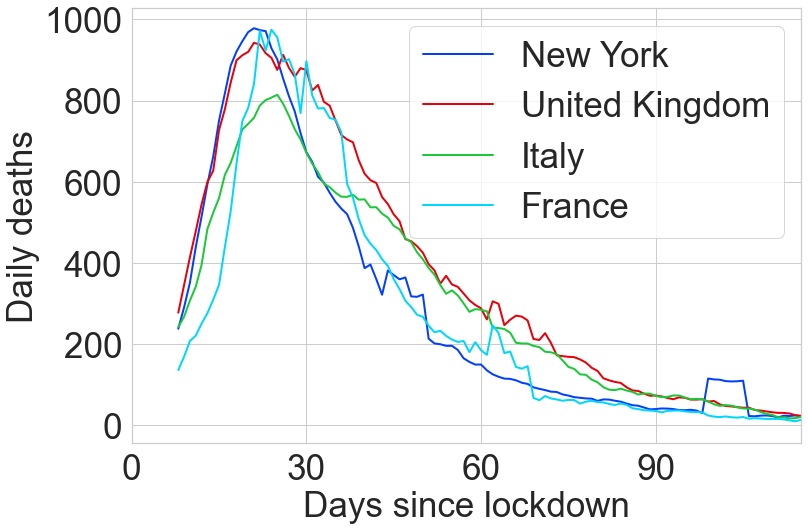

In [19]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (12, 8)


group = ['New York', 'United Kingdom', 'Italy', 'France']#list(feature_list.groupby('DB').groups[-1])
i = 0
ax = plt.subplot(1,1,1)
tick_spacing = 30
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

df[group].plot(ax = ax, xlim=[0,115])
plt.legend(fontsize=FONTSIZE, loc = 'upper right')
plt.xlabel('Days since lockdown',fontsize=FONTSIZE)#, plt.title('Marker Size = Death Count when intervention applied', fontdict = {'fontsize' : FONTSIZE}),
plt.ylabel('Daily deaths',fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE), plt.yticks(fontsize=FONTSIZE)
plt.savefig('../Figures/COVID/align.pdf', bbox_inches='tight')
    

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



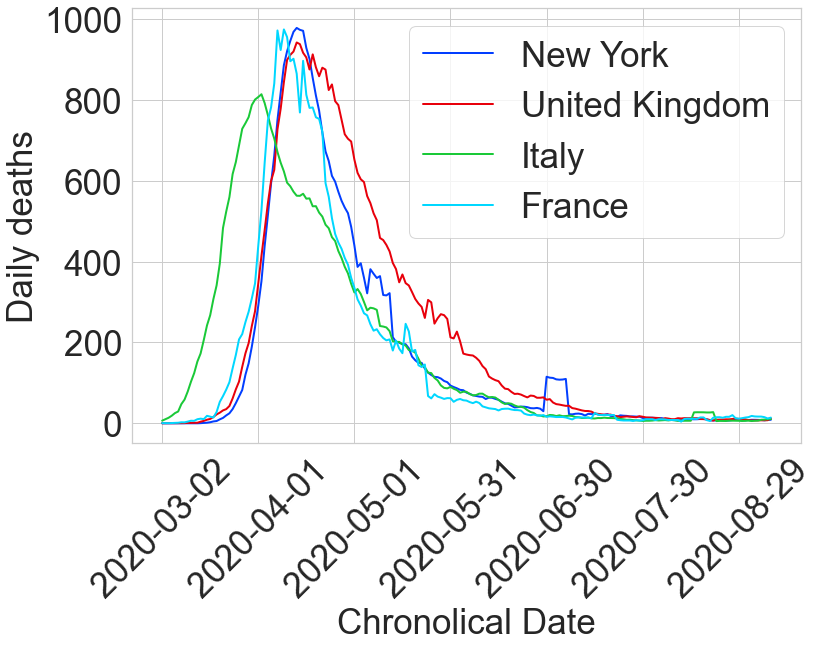

In [20]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (12, 8)
ax = plt.subplot(1,1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
tick_spacing = 30
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

all_data_daily[group].loc['2020-03-02':,:].plot(ax = ax), plt.xticks(rotation=45), plt.legend(fontsize=FONTSIZE)
plt.xlabel('Chronolical Date',fontsize=FONTSIZE)#, plt.title('Marker Size = Death Count when intervention applied', fontdict = {'fontsize' : FONTSIZE}),
plt.ylabel('Daily deaths',fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE), plt.yticks(fontsize=FONTSIZE)
plt.savefig('../Figures/COVID/chron.pdf', bbox_inches='tight')



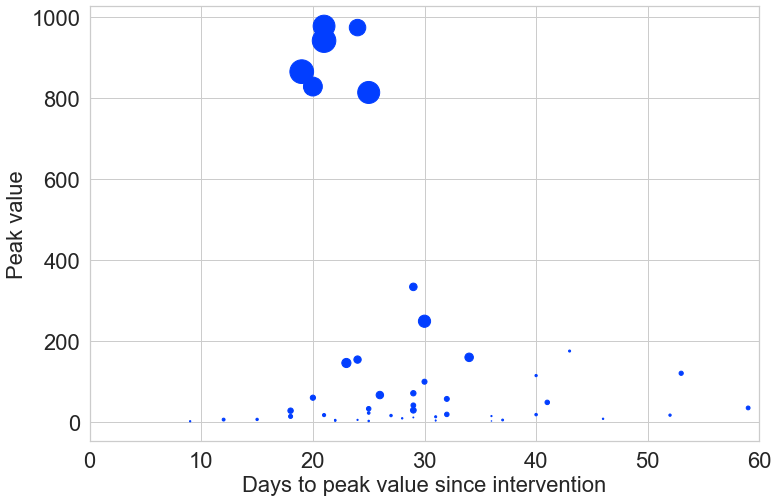

In [21]:
FONTSIZE = 22

df = create_peak_clusters(deaths_intervention_adjusted_daily,7)
plt.figure(figsize=(12,8))
#fig, ax = plt.subplots(1,1)
#FONTSIZE = 18

plt.rcParams.update({'font.size': 20})
tick_spacing = 30
# this is a bug in matplotlib
#plt.rcParams['figure.figsize'] = (24.0, 18.0)

#label_markings = ax.get_xticklabels()
#ax.set_xticklabels(label_markings, rotation=45)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlim([0,60])
plt.scatter(df['days to peak'], (df['peak value']), s=2*df['initial value']),
#plt.scatter(global_peak_size_thresh['days to peak'], (global_peak_size_thresh['peak value']), s=2*global_peak_size_thresh['initial value'], color='r'), 
plt.xlabel('Days to peak value since intervention',fontsize=FONTSIZE)#, plt.title('Marker Size = Death Count when intervention applied', fontdict = {'fontsize' : FONTSIZE}),
plt.ylabel('Peak value',fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE), plt.yticks(fontsize=FONTSIZE)


variablelabel = df.index

for i, txt in enumerate(variablelabel):
    if(df['peak value'][i]>3500):
        plt.annotate(txt, (df['days to peak'][i], df['peak value'][i]+20))

plt.savefig('../Figures/COVID/lockdown_impact.pdf', bbox_inches='tight')

FONTSIZE = 35


In [22]:
country_population = pd.read_excel("../data/mobility/country_pop_WDI.xlsx")
county_population = pd.read_excel("../data/mobility/co-est2019-annres.xlsx", header=[3])
new = county_population['Unnamed: 0'].str.replace(".","").str.replace(" County","").str.split(pat=",", expand=True)
county_population['state']=new[1].str.strip()
state_population = county_population.groupby('state').sum()
us_state_population = pd.DataFrame()
us_state_population['Country'] = state_population.index
us_state_population['Value'] = state_population[[2019]].values

all_population = pd.concat([country_population, us_state_population], axis=0, ignore_index=True)

In [24]:

df = deaths_intervention_adjusted_daily
df = df[df.columns[(df>10).any()]].copy()

df1 = cases_intervention_adjusted_daily[df.columns].copy()


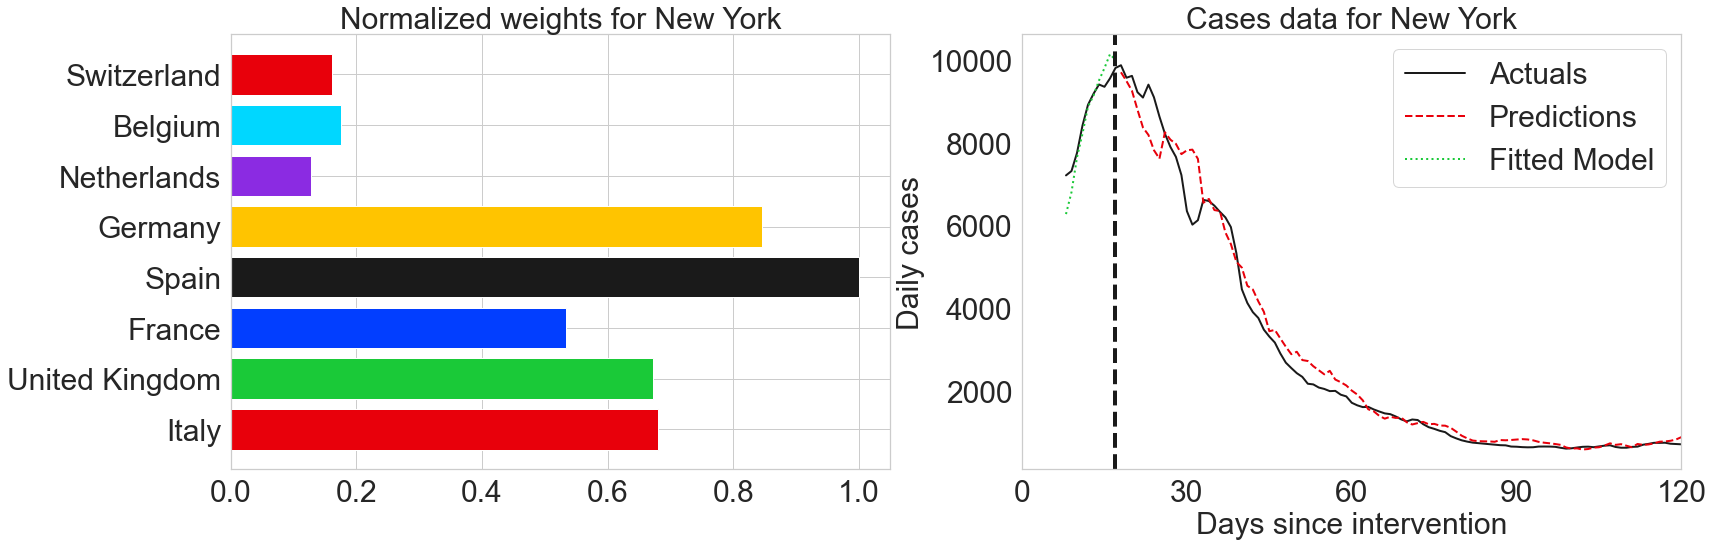

In [27]:
#plt.rcParams['figure.figsize'] = (24.0, 9.0)
#plt.rcParams.update({'font.size': 12})
lambdas = [1, 50]

projection_period=120
training_period=10
fig, axes = plt.subplots(1, 2, figsize=(26,8))
newdata = synth_control_predictions([df1, df],projection_period, training_period, 
                                            "Cases data", 1, ylimit=[],xlimit =[0,120], savePlots=True, do_only=['New York'], showstates=10,
                               exclude=[target], figure=fig, axes=axes, donorPool=['Italy', 'United Kingdom', 'France', 'Spain', 'Germany', 'Netherlands', 'Belgium', 'Switzerland'], 
                                    svdSpectrum=False, silent=True, showDonors=True, showPlots=True, lambdas=lambdas, mRSC=False, error_thresh = 10, FONTSIZE=30, yaxis = 'Daily cases')




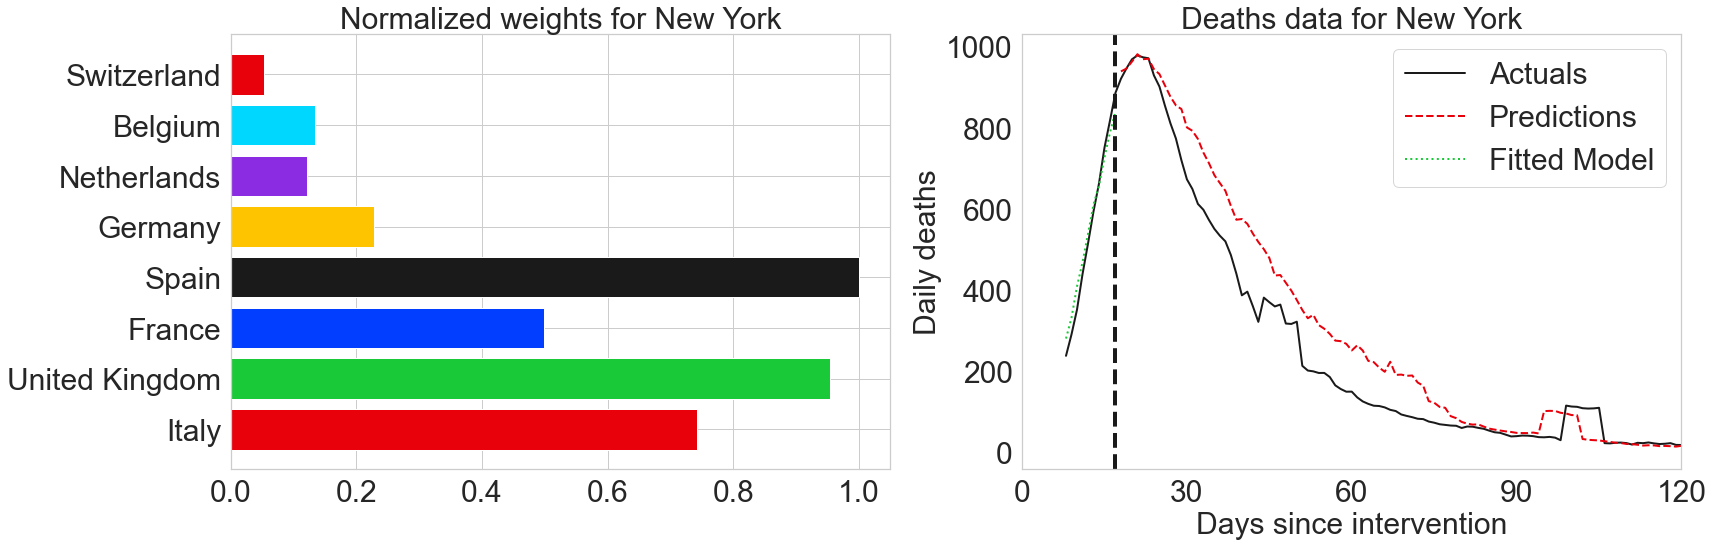

In [28]:
#plt.rcParams['figure.figsize'] = (24.0, 9.0)

lambdas = [1, 0.02]
projection_period=120
training_period=10
fig, axes = plt.subplots(1, 2, figsize=(26,8))

newdata = synth_control_predictions([df, df1],projection_period, training_period, 
                                            "Deaths data", 1, ylimit=[],xlimit =[0,120], savePlots=True, do_only=['New York'], showstates=10,
                               exclude=[target], figure=fig, axes=axes, donorPool=['Italy', 'United Kingdom', 'France', 'Spain', 'Germany', 'Netherlands', 'Belgium', 'Switzerland'], 
                                    svdSpectrum=False, silent=True, showDonors=True, showPlots=True, lambdas=lambdas, mRSC=False, error_thresh = 10, FONTSIZE=30, yaxis = 'Daily deaths')




<ipython-input-26-d2dddde6140d>:151: UserWarning:

FixedFormatter should only be used together with FixedLocator



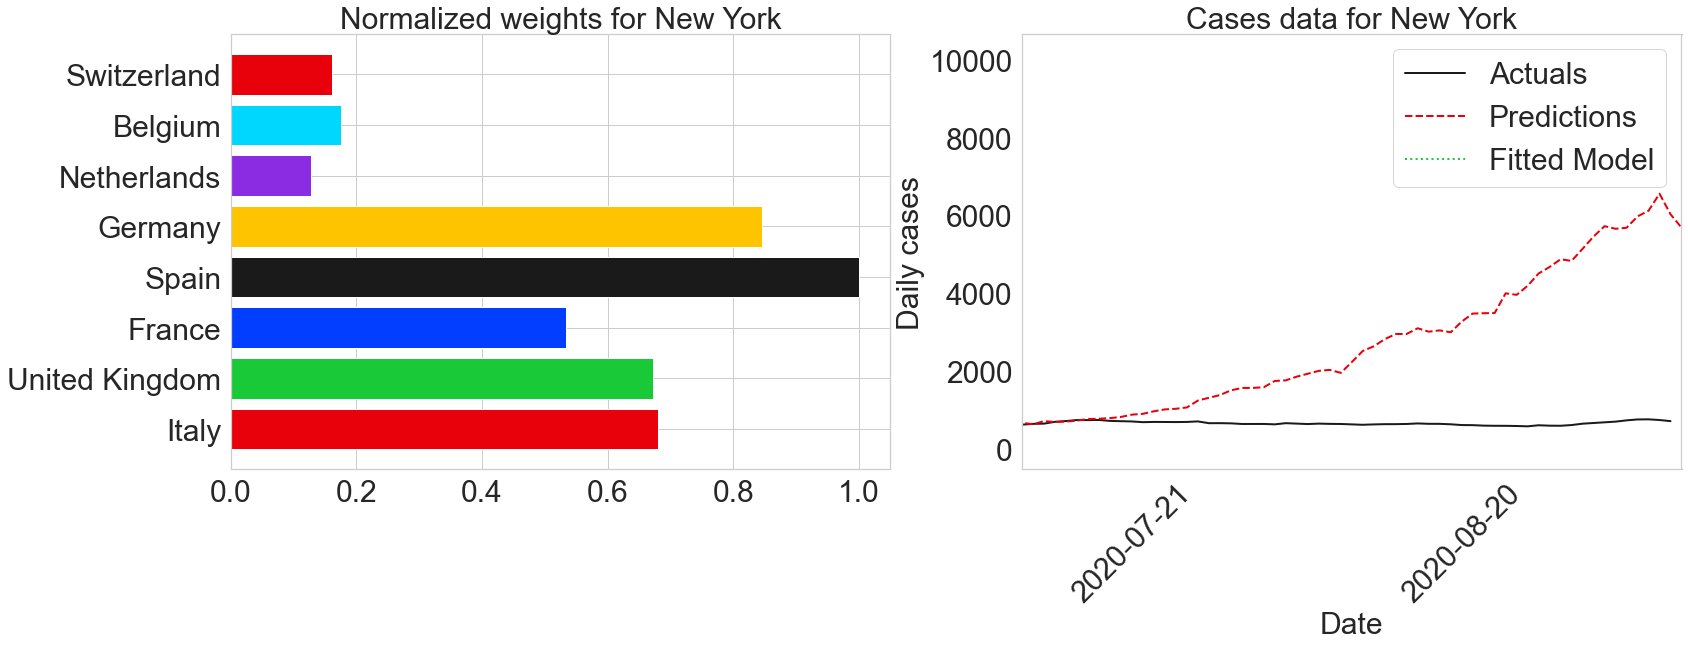

In [29]:
#plt.rcParams['figure.figsize'] = (24.0, 9.0)
#plt.rcParams.update({'font.size': 12})
lambdas = [1, 50]

projection_period=180
training_period=10
fig, axes = plt.subplots(1, 2, figsize=(26,8))
newdata = synth_control_predictions([df1, df],projection_period, training_period, 
                                            "Cases data", 1, ylimit=[],xlimit =[110,170], savePlots=True, do_only=['New York'], showstates=10,
                               exclude=[target], figure=fig, axes=axes, donorPool=['Italy', 'United Kingdom', 'France', 'Spain', 'Germany', 'Netherlands', 'Belgium', 'Switzerland'], 
                                    svdSpectrum=False, silent=True, showDonors=True, showPlots=True, lambdas=lambdas, mRSC=False, error_thresh = 10, FONTSIZE=30, yaxis = 'Daily cases', intervention_date_x_ticks = intervention_date_case)




<ipython-input-26-d2dddde6140d>:151: UserWarning:

FixedFormatter should only be used together with FixedLocator



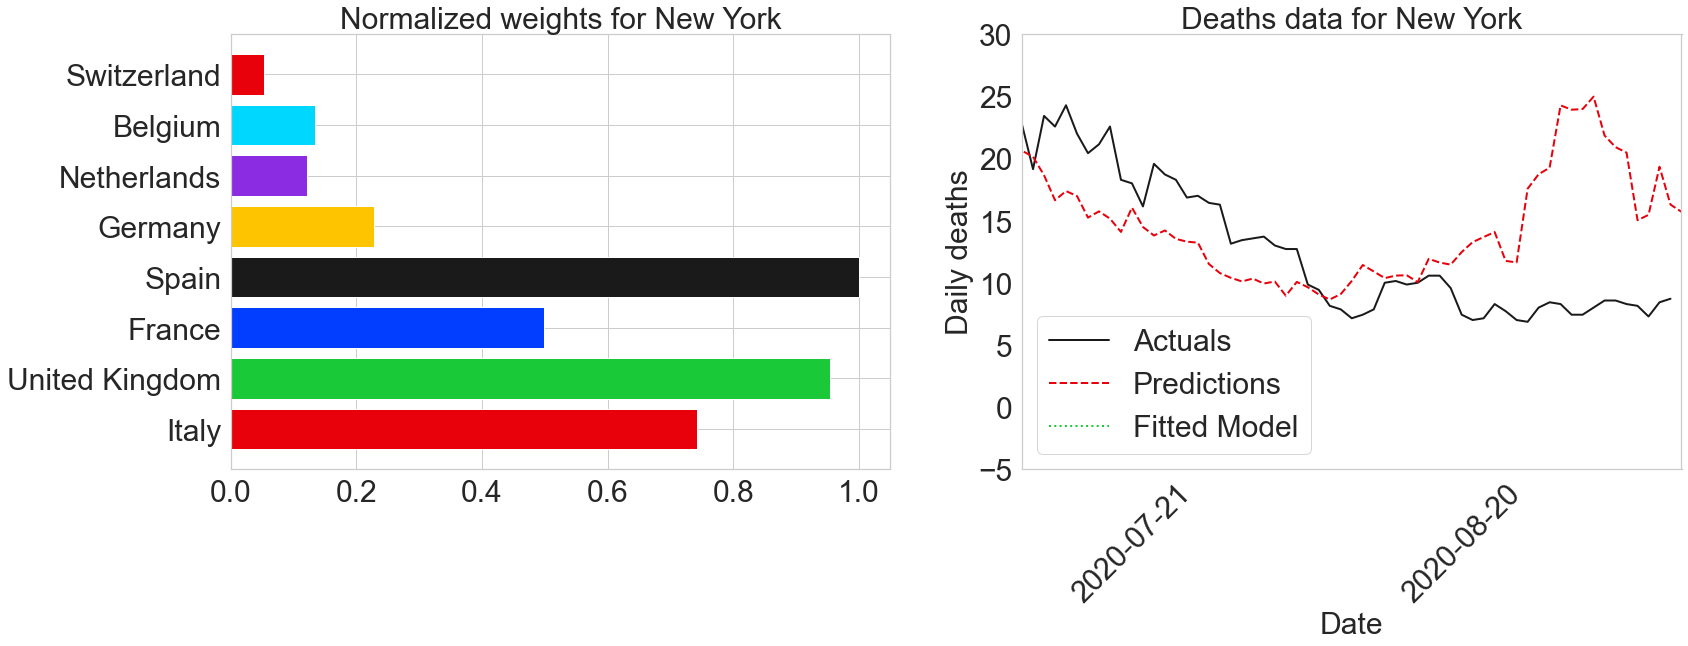

In [30]:
#plt.rcParams['figure.figsize'] = (24.0, 9.0)

lambdas = [1, 0.02]
projection_period=170
training_period=10
fig, axes = plt.subplots(1, 2, figsize=(26,8))

newdata = synth_control_predictions([df, df1],projection_period, training_period, 
                                            "Deaths data", 1, ylimit=[-5, 30],xlimit =[110,170], savePlots=True, do_only=['New York'], showstates=10,
                               exclude=[target], figure=fig, axes=axes, donorPool=['Italy', 'United Kingdom', 'France', 'Spain', 'Germany', 'Netherlands', 'Belgium', 'Switzerland'], 
                                    svdSpectrum=False, silent=True, showDonors=True, showPlots=True, lambdas=lambdas, mRSC=False, error_thresh = 10, FONTSIZE=30, yaxis = 'Daily deaths', intervention_date_x_ticks = intervention_date_death)




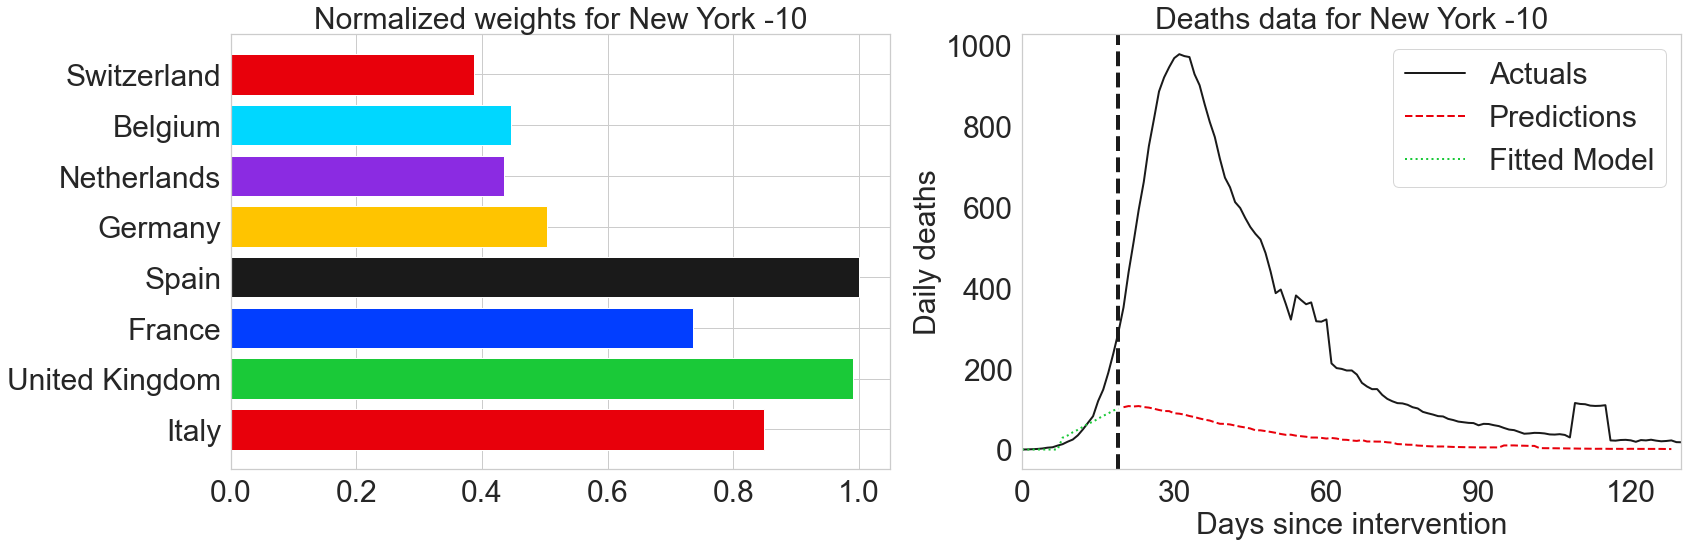

In [31]:
singVals = 1
projection_period=130
training_period=20

fig, axes = plt.subplots(1, 2, figsize=(26,8))
temp_df,_= filter_data_by_intervention(all_data_daily[['New York']], educational_distancing, 10)

# This has been made silent as to not flood the output
#[pd.concat([deaths_intervention_adjusted_daily,temp_df]
return_value = synth_control_predictions([pd.concat([deaths_intervention_adjusted_daily,temp_df], axis=1)], projection_period, training_period, "Deaths data", singVals, ylimit=[], 
                           savePlots=True, do_only=["New York -10"],xlimit =[0,130], showstates=10,
                           exclude=['New York'], figure=fig, axes=axes, donorPool=['Italy', 'United Kingdom', 'France', 'Spain', 'Germany', 'Netherlands', 'Belgium', 'Switzerland'], 
                           svdSpectrum=False, silent=True, showDonors=True, showPlots=True,  mRSC=False, error_thresh = 10, FONTSIZE=30, yaxis = 'Daily deaths')#lambdas=lambdas, random_distribution=dist



# Mobility Analysis

In [32]:
all_population, us_population, usstates_population, uscounties_population = load_clean('population')

CTP = load_clean('CTP states')
CTP_pop_adjusted = {name: create_population_adjusted_data(CTP[name], all_population) for name in CTP}

In [33]:
#Filter data (this part might be overlapping some cells, but it should contain most of the varilables that are analyzed. )
# This part might be to split and explain
# This part might be to split and explain
t = 7
column = list(mobility_data_google.columns).index('retail_and_recreation_percent_change_from_baseline')
global_deaths_filtered = create_filtered_data(global_deaths, 500 )
#the last column of social distancing dataset is the last social distancing measure used by a location
educational_distancing = get_social_distancing(sd_data, sd_data.columns[-1])

all_data = pd.concat([global_deaths, usdeaths, uscounties_deaths], axis=1)  
all_data_daily = create_rolling_data(all_data, t)

all_data_cases = pd.concat([global_cases, uscases, uscounties_cases], axis=1) 
all_data_cases_daily = create_rolling_data(all_data_cases, t)

all_cases_data_pop = pd.concat([uscases_pop_adjusted,global_cases_pop_adjusted, uscounties_cases_pop_adjusted], axis = 1)
all_cases_data_pop_daily = create_rolling_data(all_cases_data_pop, t)

all_death_data_pop = pd.concat([usdeaths_pop_adjusted,global_deaths_pop_adjusted, uscounties_deaths_pop_adjusted], axis = 1)
all_death_data_pop_daily = create_rolling_data(all_death_data_pop, t)

_, daily_global, intervention_date_global = create_intervention_adjusted_data(global_deaths, educational_distancing, t)
_, daily_us, intervention_date_us = create_intervention_adjusted_data(usdeaths, educational_distancing, t)
_, daily_uscounties, intervention_date_uscounties = create_intervention_adjusted_data(uscounties_deaths, educational_distancing, t)

cases_intervention_adjusted, cases_intervention_adjusted_daily, intervention_date_case = create_intervention_adjusted_data(all_data_cases, educational_distancing, t)
deaths_intervention_adjusted, deaths_intervention_adjusted_daily, intervention_date_death = create_intervention_adjusted_data(all_data, educational_distancing, t)
#deaths_intervention_adjusted_google, deaths_intervention_adjusted_daily_google, _ = create_intervention_adjusted_data(all_data, google_social, t)

all_cases_data_pop_adjusted, all_cases_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_cases_data_pop, educational_distancing, t)
all_death_data_pop_adjusted, all_death_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_death_data_pop, educational_distancing, t)

last date
Exceptions are []


In [34]:
column = list(mobility_data_google.columns).index('retail_and_recreation_percent_change_from_baseline')
mobility_data_google['county_state'] = mobility_data_google['sub_region_2'] + '-' + mobility_data_google['sub_region_1']
us_mobility_county = mobility_data_google.loc[mobility_data_google.country_region == 
                                       "United States"].pivot_table(index='date', values=mobility_data_google.columns[column], columns='county_state')
us_mobility_state =  mobility_data_google.loc[mobility_data_google.country_region == 
                                       "United States"].pivot_table(index='date', values=mobility_data_google.columns[column], columns='sub_region_1')

In [35]:
#df_sample = pd.read_csv('minoritymajority.csv') #use if the following line does not work
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
fips = df_sample[['FIPS', 'STNAME', 'CTYNAME']]

fips.columns = ['fips', 'state', 'county']

In [36]:
us_mobility_state.index = pd.to_datetime(us_mobility_state.index)
state_adjusted = pd.DataFrame()
for state in us_mobility_state:
    #if state == 'New York' or state == 'New Jersey':
    #    continue
    if (sd_data['name'] == state).any():
        intervention_date = pd.to_datetime(sd_data[sd_data['name'] == state]['last date'].values[0])
        new_col = pd.Series(us_mobility_state[state]
                            [(us_mobility_state[state].index > intervention_date)].values, 
                             name = state)
        

        state_adjusted = pd.concat([state_adjusted, new_col], axis = 1 )

In [37]:
feature_dict, features = cluster_time_series(state_adjusted.iloc[:30], cluster_method = 'kmeans', n_clusters = 4)                         
colors = get_colors(len(feature_dict), picker = 2)

In [38]:
plt.rcParams.update({'font.size': 30})
cluster_df = features['cluster'].reset_index()
cluster_df.columns = ['state', 'cluster']

fips.columns = ['fips', 'state', 'county']
cluster_df = pd.merge(cluster_df, fips, how = 'inner', on = 'state')

group = cluster_df['fips']
values = cluster_df['cluster']
fig = ff.create_choropleth(fips=group, values=values, colorscale = colors)
fig.layout.template = None

fig.update_layout(
    font=dict(
        family="Arial",
        size=FONTSIZE
    )
)

fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



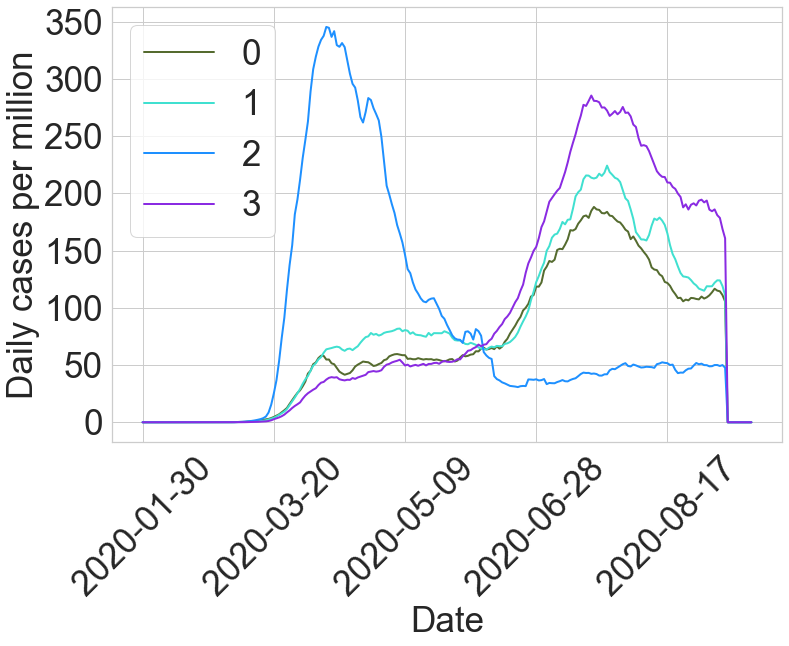

In [39]:
plt.rcParams['figure.figsize'] = (12, 8)
dfplot=all_data_cases_daily
i=0
for key in feature_dict:
    group = feature_dict[key]
    temp = []
    for county in group:
        if county in dfplot.columns:
            temp.append(county)
    (1000000*dfplot[temp].sum(axis=1)/(all_population[all_population.index.isin(temp)].value.sum())).plot(label = key, c = colors[i])
    #(1000000*dfplot[temp].sum(axis=1)/(all_population[all_population.index.isin(temp)].value.sum())).plot(label=group_labels[i])
    plt.ylabel('Daily cases per million',fontsize = FONTSIZE), plt.legend(fontsize = FONTSIZE)#plt.title('Cases'),
    plt.xlabel('Date', fontsize = FONTSIZE)
    plt.xticks(rotation=45, fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE) 
    i=i+1
    
plt.savefig('../Figures/COVID/mobility_cases.pdf', bbox_inches='tight')

plt.show()


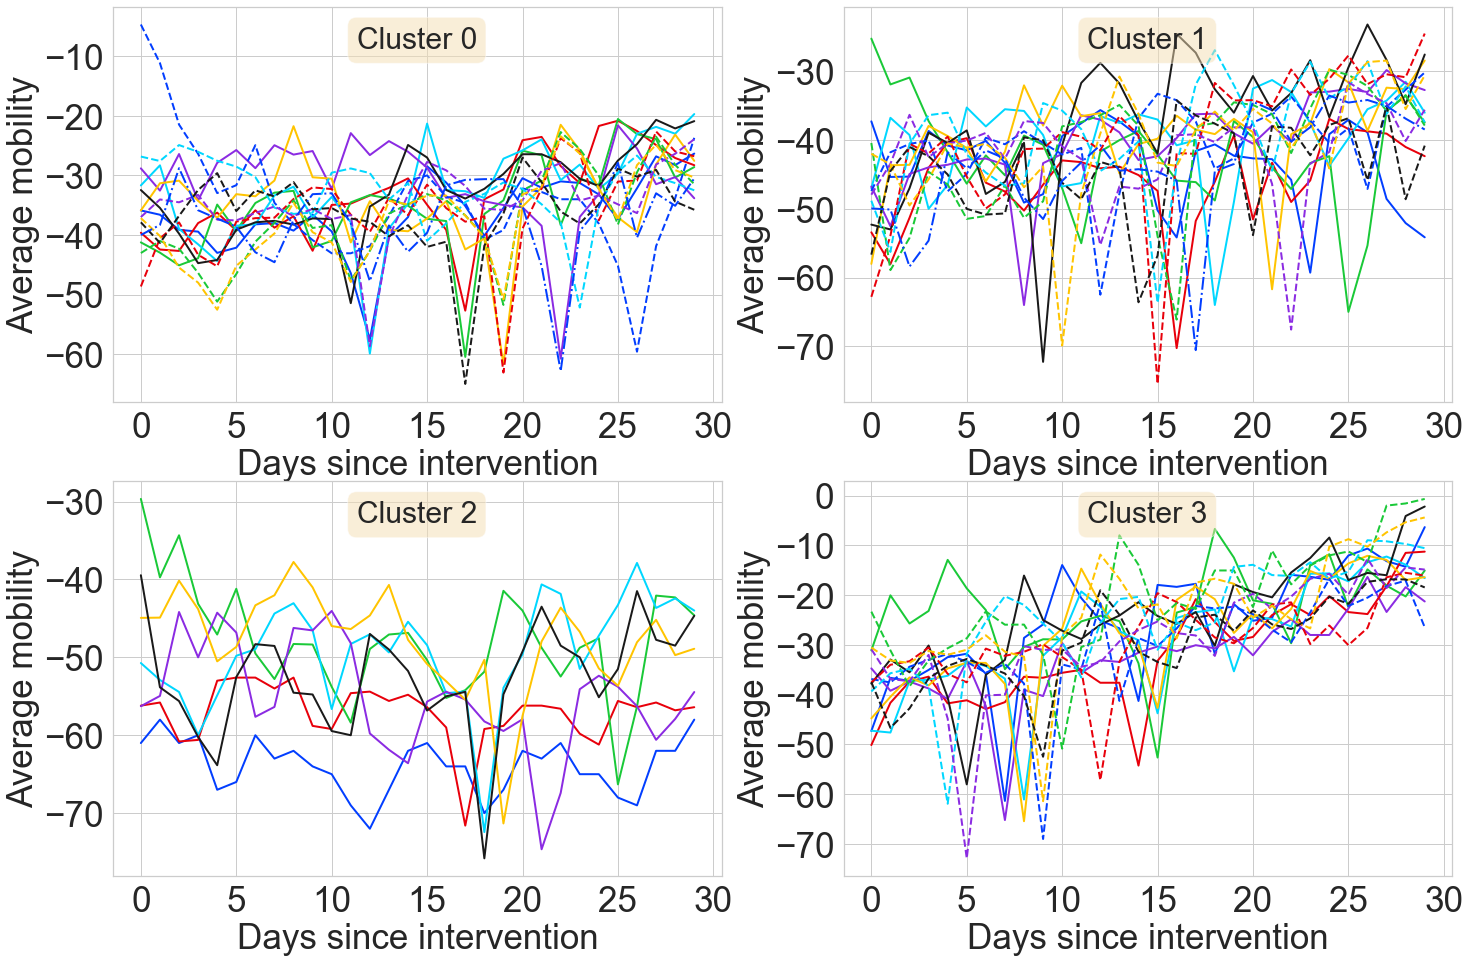

In [40]:
i = 221
for key in feature_dict:
    ax = plt.subplot(i)
    i += 1
    state_adjusted.iloc[:30][feature_dict[key]].plot(ax = ax, legend=False, figsize = (24, 16))
    #plt.title("Cluster %s" %(key),fontsize = FONTSIZE,position=(0.5, 0.9))

    plt.xticks(fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE) 
    plt.xlabel("Days since intervention",fontsize = FONTSIZE) 
    plt.ylabel("Average mobility",fontsize = FONTSIZE) 
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.4, 0.95, "Cluster %s" %(key), transform=ax.transAxes, fontsize=FONTSIZE-5, verticalalignment='top', bbox=props)
    
    
    plt.savefig('../Figures/COVID/mobility_clusters.pdf', bbox_inches='tight')

In [41]:
#Some descriptive information
for key in feature_dict:
    print('In Group %s'%(key))
    last_day_case = uscases_pop_adjusted[feature_dict[key]].iloc[-1]
    print("Last day population adjusted Cases: Mean %s STD %s"%(last_day_case.mean(), last_day_case.std()))
    
    last_day_death = usdeaths_pop_adjusted[feature_dict[key]].iloc[-1]
    print("Last day Population adjusted Death: Mean %s STD %s"%(last_day_death.mean(), last_day_death.std()))
    
    print("Average Mobility Change %s percent "%(np.mean(state_adjusted.iloc[:30][feature_dict[key]].mean())))
    
    print("\n")
    

In Group 0
Last day population adjusted Cases: Mean 15716.172448446125 STD 7767.926319332958
Last day Population adjusted Death: Mean 345.88852819951813 STD 271.1394558913055
Average Mobility Change -34.637247571296754 percent 


In Group 1
Last day population adjusted Cases: Mean 15314.60075793214 STD 6866.536718555227
Last day Population adjusted Death: Mean 487.9538449366599 STD 325.43523988857885
Average Mobility Change -41.284365853160125 percent 


In Group 2
Last day population adjusted Cases: Mean 14974.987833562802 STD 7901.93751100069
Last day Population adjusted Death: Mean 929.4247992434337 STD 706.2943339513964
Average Mobility Change -53.375861958544654 percent 


In Group 3
Last day population adjusted Cases: Mean 20890.189976498452 STD 5386.431368510696
Last day Population adjusted Death: Mean 366.70068299046807 STD 205.6826034253856
Average Mobility Change -26.985676174245974 percent 




# Bars Impact

In [42]:
ustates_list = list(uscases.columns)
bars_banned = ['Massachusetts', 'New Mexico', 'Kansas', 'District of Columbia', 'Rhode Island', 'North Carolina']
no_bar_no_dining = ['New York', 'New Jersey', 'Connecticut']
indoor_bars = list(set(ustates_list) - set(bars_banned) - set(no_bar_no_dining))
groups = [bars_banned, indoor_bars, no_bar_no_dining]
group_labels = ['Indoor Dining Allowed', 'Indoor Dining and Bars Allowed', 'No dine in, no bars']

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



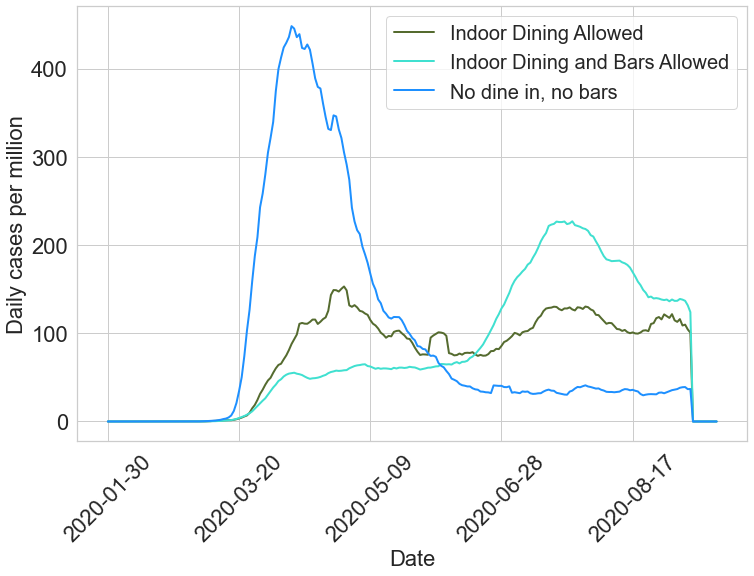

In [43]:
#FONTSIZE = 18
FONTSIZE = 22
plt.rcParams['figure.figsize'] = (12, 8)
dfplot=all_data_cases_daily
i=0
for j,group in enumerate(groups):
    temp = []
    for county in group:
        if county in dfplot.columns:
            temp.append(county)
    (1000000*dfplot[temp].sum(axis=1)/(all_population[all_population.index.isin(temp)].value.sum())).plot(label = group_labels[j], c = colors[i])
    #(1000000*dfplot[temp].sum(axis=1)/(all_population[all_population.index.isin(temp)].value.sum())).plot(label=group_labels[i])
    plt.ylabel('Daily cases per million',fontsize = FONTSIZE), plt.legend(fontsize = 20)#plt.title('Cases'),
    plt.xlabel('Date', fontsize = FONTSIZE)
    plt.xticks(rotation=45, fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE) 
    i=i+1
    
plt.savefig('../Figures/COVID/dinein-bars.pdf', bbox_inches='tight')

plt.show()

FONTSIZE = 35


# Prop 99

In [44]:
directory = os.path.dirname(testdata.__file__)

filename = directory + '/prop99.csv'


df = pd.read_csv(filename)
df = df[df['SubMeasureDesc'] == 'Cigarette Consumption (Pack Sales Per Capita)']
pivot = df.pivot_table(values='Data_Value', index='LocationDesc', columns=['Year'])
dfProp99 = pd.DataFrame(pivot.to_records())

allColumns = dfProp99.columns.values

states = list(np.unique(dfProp99['LocationDesc']))
years = np.delete(allColumns, [0])
caStateKey = 'California'
states.remove(caStateKey)
otherStates = states

yearStart = 1970
yearTrainEnd = 1989
yearTestEnd = 2015

p = 1.0

trainingYears = []
for i in range(yearStart, yearTrainEnd, 1):
    trainingYears.append(str(i))

testYears = []
for i in range(yearTrainEnd, yearTestEnd, 1):
    testYears.append(str(i))

trainDataMasterDict = {}
trainDataDict = {}
testDataDict = {}
for key in otherStates:
    series = dfProp99.loc[dfProp99['LocationDesc'] == key]

    trainDataMasterDict.update({key: series[trainingYears].values[0]})

    # randomly hide training data
    (trainData, pObservation) = tsUtils.randomlyHideValues(copy.deepcopy(trainDataMasterDict[key]), p)
    trainDataDict.update({key: trainData})
    testDataDict.update({key: series[testYears].values[0]})
series = dfProp99[dfProp99['LocationDesc'] == caStateKey]
trainDataMasterDict.update({caStateKey: series[trainingYears].values[0]})
trainDataDict.update({caStateKey: series[trainingYears].values[0]})
testDataDict.update({caStateKey: series[testYears].values[0]})

trainMasterDF = pd.DataFrame(data=trainDataMasterDict)
trainDF = pd.DataFrame(data=trainDataDict)
testDF = pd.DataFrame(data=testDataDict)

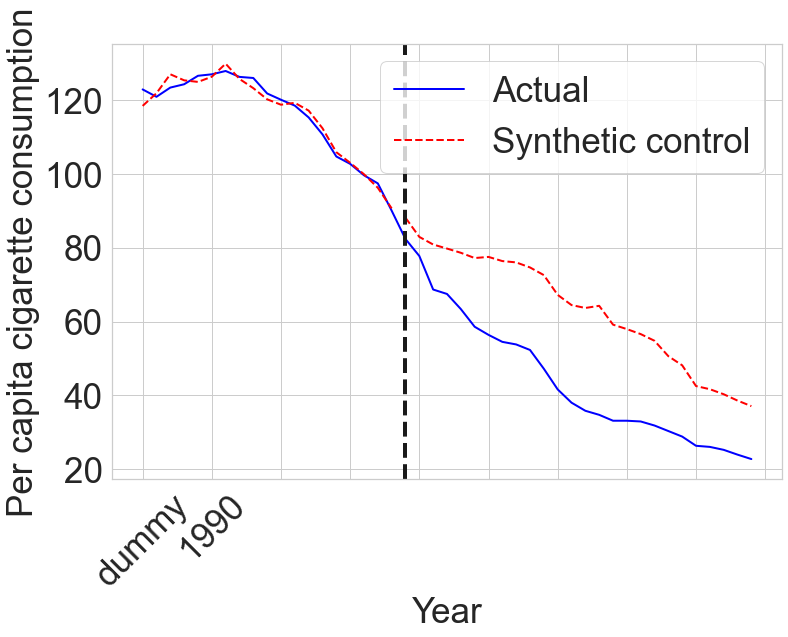

In [45]:

singvals = 4
rscModel = RobustSyntheticControl(caStateKey, singvals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
rscModel.fit(trainDF)
denoisedDF = rscModel.model.denoisedDF()
predictions = []
predictions = np.dot(testDF[otherStates], rscModel.model.weights)
predictions_noisy = np.dot(testDF[otherStates], rscModel.model.weights)
actual = dfProp99.loc[dfProp99['LocationDesc'] == caStateKey]
actual = actual.drop('LocationDesc', axis=1)
actual = actual.iloc[0]
model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)

fig, ax = plt.subplots(1,1)
tick_spacing = 5
# this is a bug in matplotlib
label_markings = np.insert(years[::tick_spacing], 0, 'dummy')

ax.set_xticks(np.arange(len(label_markings)))
ax.set_xticklabels(label_markings, rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.rcParams['figure.figsize'] = (12, 8.0)
plt.grid()
plt.plot(years, actual ,label='Actual',color = 'blue')
plt.xlabel('Year', fontsize = FONTSIZE)
plt.ylabel('Per capita cigarette consumption', fontsize = FONTSIZE)
plt.plot(trainingYears, model_fit, linestyle='--', color = 'red') #label='fitted'
plt.plot(testYears, predictions, linestyle='--',color = 'red', label='Synthetic control')
#plt.plot(testYears, predictions_noisy, label='counterfactual noisy')
#plt.title(caStateKey+', Singular Values used: '+str(singvals))
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

xposition = pd.to_datetime(yearTrainEnd,  errors='coerce')

plt.axvline(x=str(yearTrainEnd), color='k', linestyle='--', linewidth=4), plt.legend(fontsize = FONTSIZE)
plt.grid()
plt.savefig('../Figures/COVID/prop99_SC.pdf', bbox_inches='tight')




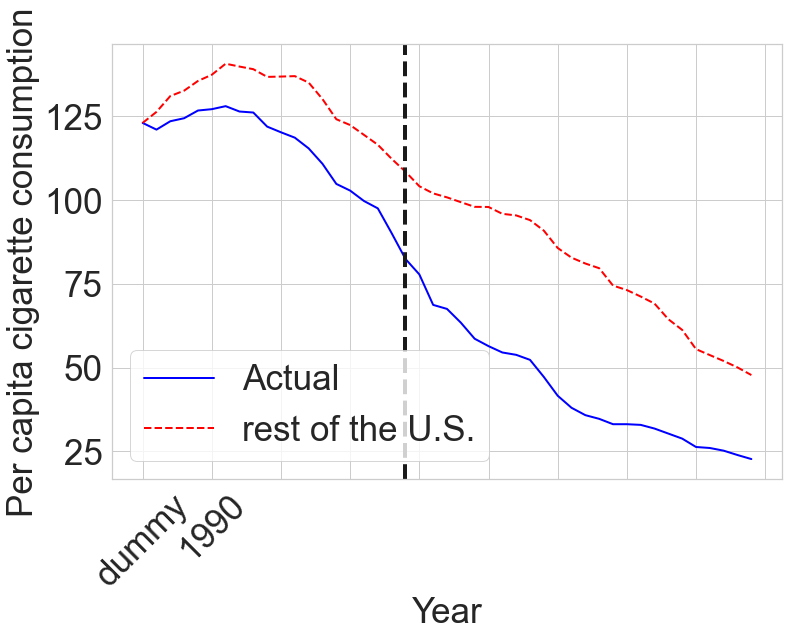

In [46]:


AB_df = dfProp99.copy()
AB_df = AB_df.drop([4], axis=0)
AB_series = AB_df.mean()
AB_series = AB_series * actual[0]/ AB_series[0]
#print(AB_series[0])
#print(actual[0])



#lt.plot(years,AB_series)


fig, ax = plt.subplots(1,1)
tick_spacing = 5
# this is a bug in matplotlib
label_markings = np.insert(years[::tick_spacing], 0, 'dummy')

ax.set_xticks(np.arange(len(label_markings)))
ax.set_xticklabels(label_markings, rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.rcParams['figure.figsize'] = (12, 8.0)
plt.grid()


plt.plot(years, actual ,label='Actual',color = 'blue')
plt.xlabel('Year', fontsize = FONTSIZE)
plt.ylabel('Per capita cigarette consumption', fontsize = FONTSIZE)
plt.plot(years, AB_series, linestyle='--', color = 'red',label='rest of the U.S.') #label='fitted'
#plt.plot(testYears, predictions_noisy, label='counterfactual noisy')
#plt.title(caStateKey+', Singular Values used: '+str(singvals))
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)

xposition = pd.to_datetime(yearTrainEnd,  errors='coerce')

plt.axvline(x=str(yearTrainEnd), color='k', linestyle='--', linewidth=4), plt.legend(fontsize = FONTSIZE)
plt.grid()
plt.savefig('../Figures/COVID/prop99_AB.pdf', bbox_inches='tight')




# Herd Immunity Analysis

In [47]:
pop_scaled = create_population_adjusted_data(uscounties_cases, uscounties_population)
#cluster_2_states = ['New York', 'New Jersey', 'Connecticut', 'Massachusetts'] # ['District of Columbia', 'Massachusetts', 'Michigan','New Jersey', 'New York', 'Vermont'] #I exclude Hawaii
cluster_2_states = ['Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'New Jersey',
 'New York'
]
donors = []
for counties in uscounties_cases.columns:
    names = counties.split('-')
    if names[-1] in cluster_2_states and names[0] != 'Unknown':
        donors.append(counties)


Counterfactual analysis of Mask recommended counties based on a donor pool of Mask mandated counties
Intervention date:  2020-05-25


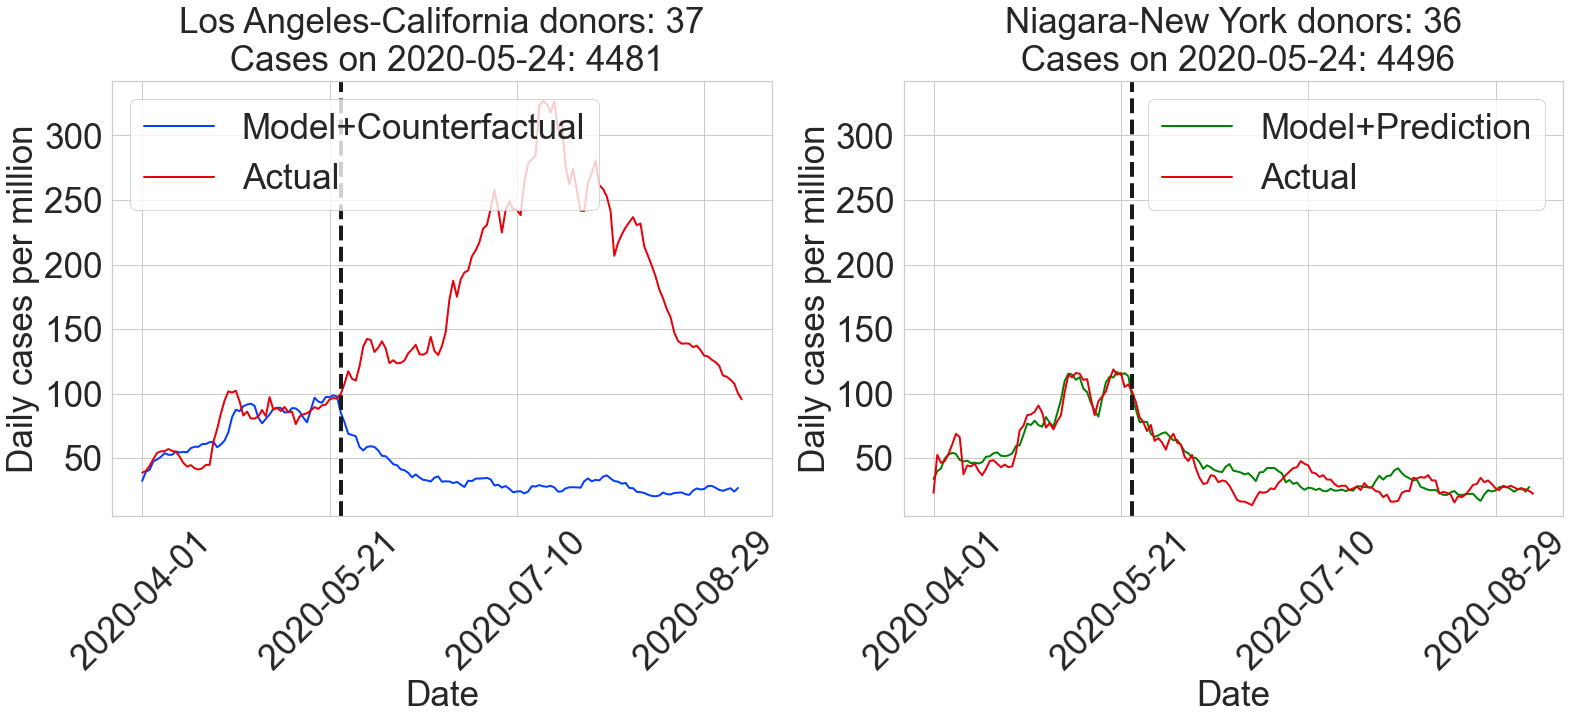

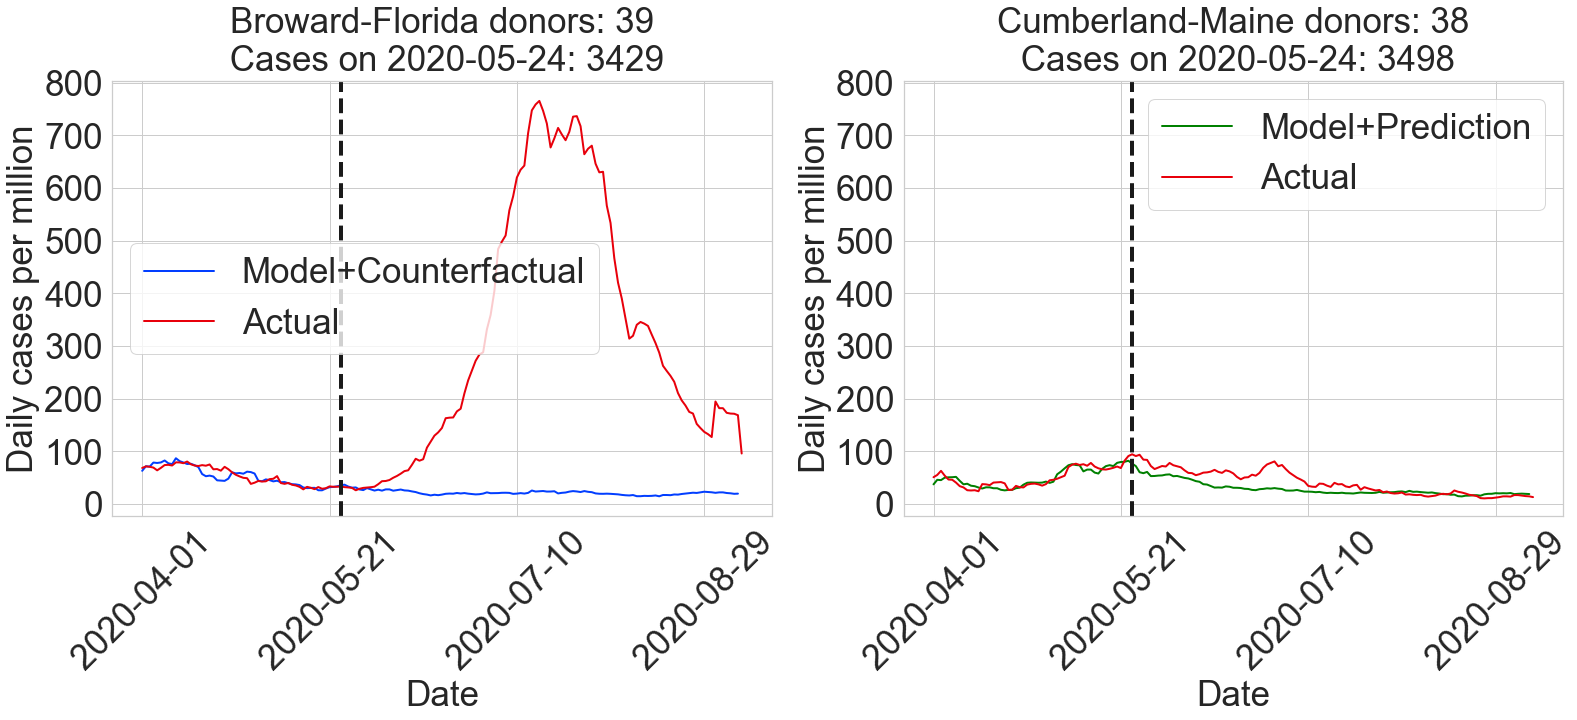

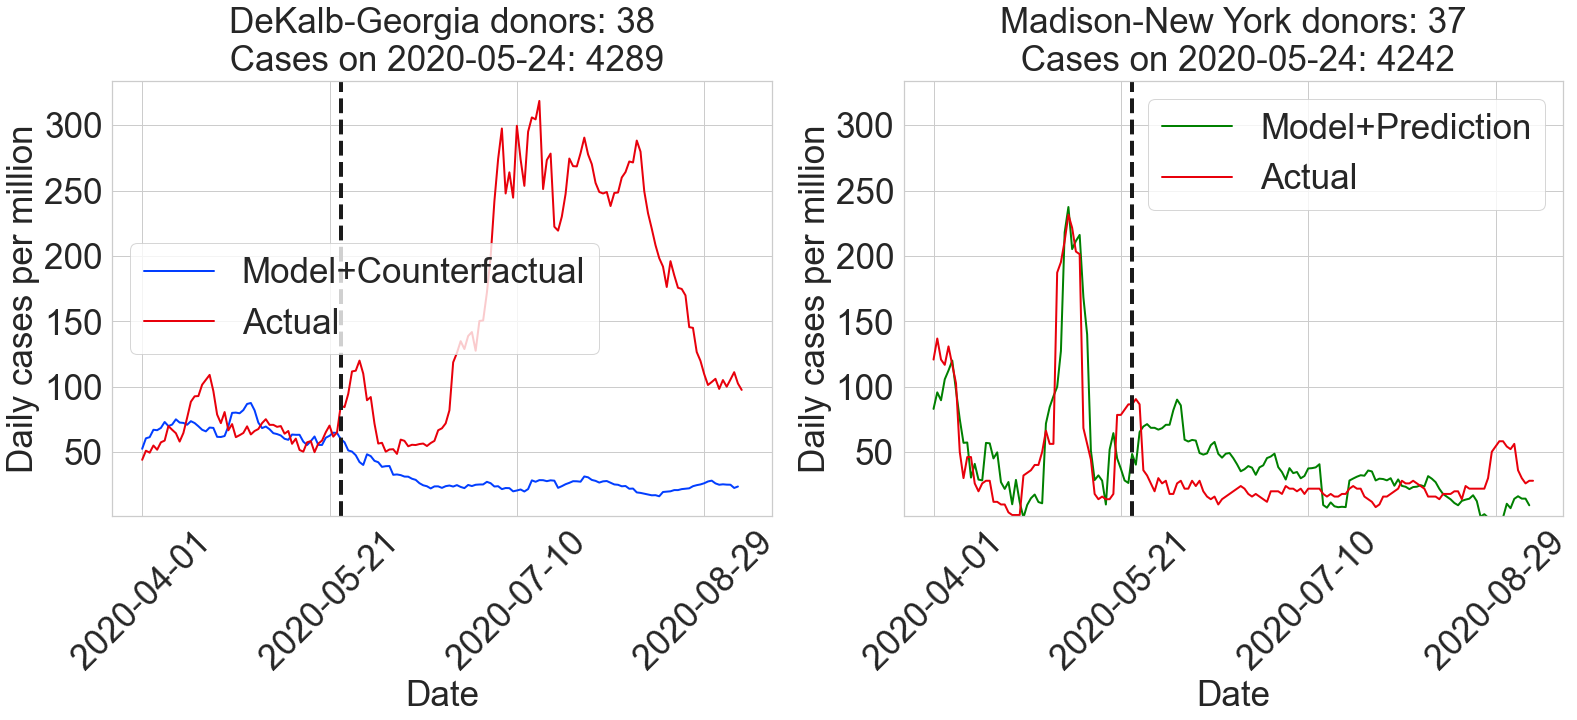

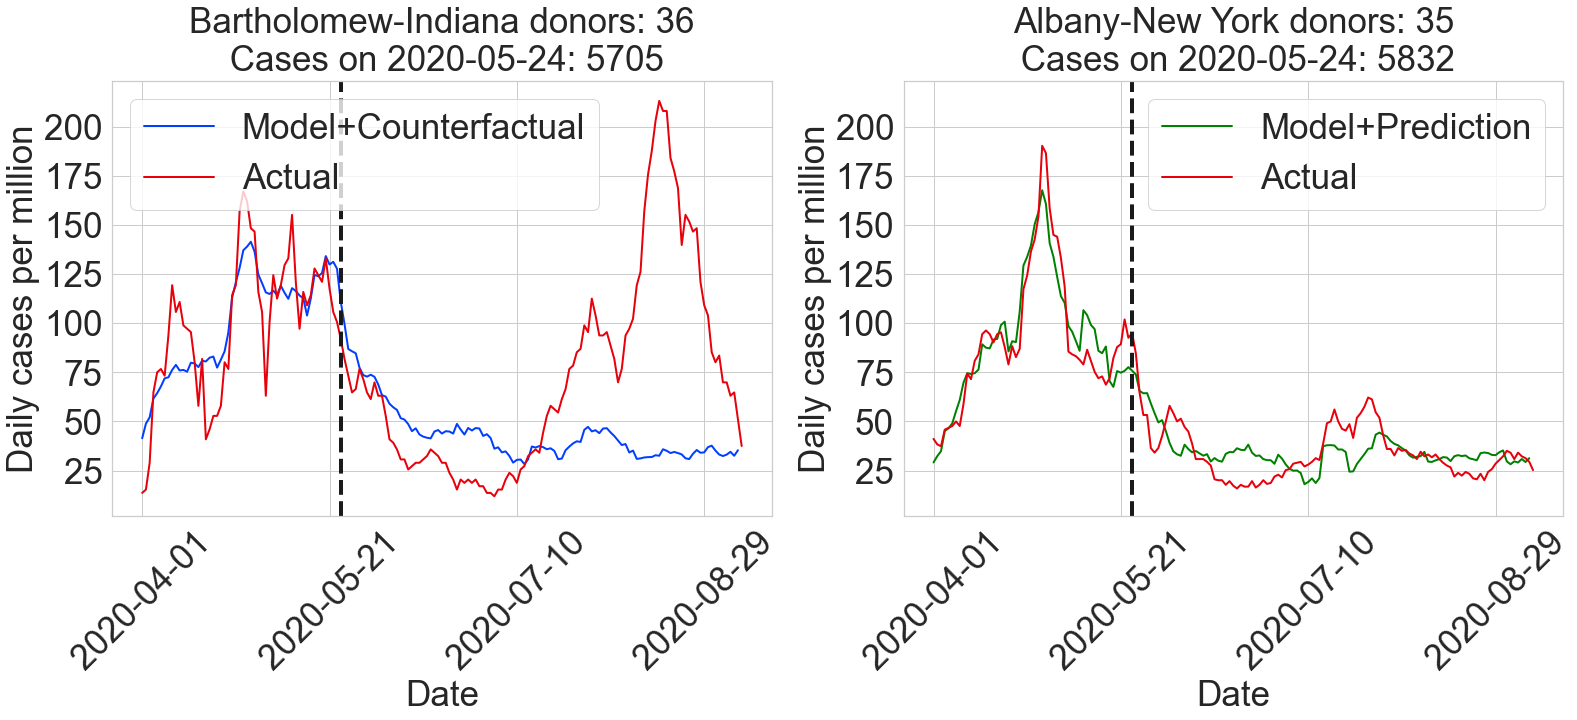

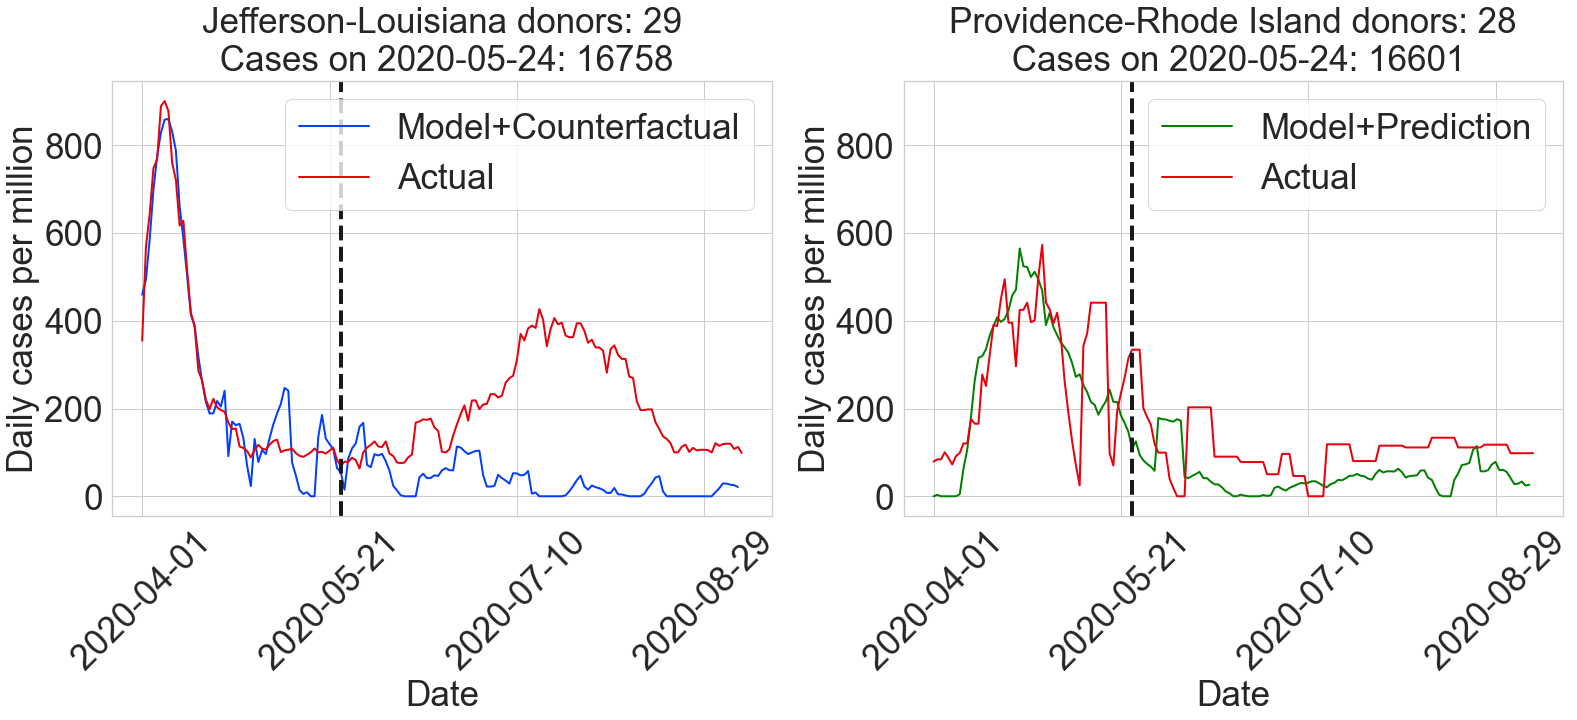

In [48]:

#df = df[df.columns[(df>100).any()]].copy()
df = all_cases_data_pop_daily.loc['2020-04-01':]
df_pop = all_cases_data_pop.loc['2020-04-01':]
plt.rcParams.update({'font.size': 30})
tick_spacing=50
#FONTSIZE = 28
#sizes = df.applynortheastries.last_valid_index)
#sizes = sizes.fillna(0).astype(int)
high_thresh = df_pop.shape[0]
low_thresh = 53# We want the first line of the output (intervention day) to be 5/25
targets = ['Los Angeles-California', 'Broward-Florida' ,'DeKalb-Georgia','Bartholomew-Indiana','Jefferson-Louisiana']#, 'Fulton-Georgia','Gwinnett-Georgia', 'Tarrant-Texas', 'Bexar-Texas','Collin-Texas','Mohave-Arizona','Yuma-Arizona','Maricopa-Arizona', 'Ascension-Louisiana',  'East Carroll-Louisiana']#counties_recommended# ['Ascension-Louisiana', 'Jefferson-Louisiana', 'Bartholomew-Indiana', 'Riverside-California', 'Broward-Florida' ]# #counties_recommended #masks_mandated
singVals=4
trainDF=df.iloc[:low_thresh,:]
testDF=df.iloc[low_thresh+1:high_thresh,:]

num_rows_to_plot = int(len(targets))+1
#plt.rcParams['figure.figsize'] = (24, num_rows_to_plot*5.0)
plt.rcParams['figure.figsize'] = (26, 8.0)

i=1
print("Counterfactual analysis of Mask recommended counties based on a donor pool of Mask mandated counties")
print("Intervention date: ", testDF.index[0])
for state in targets:
    #otherStates = donors.copy()
    otherStates = df_pop.columns[(df_pop.iloc[low_thresh] < 
                                  df_pop[state].iloc[low_thresh]+.5*df_pop[state].iloc[low_thresh])&(df_pop.iloc[low_thresh]
                                                                                                     > df_pop[state].iloc[low_thresh]-0.5*df_pop[state].iloc[low_thresh])]
    otherStates = list(otherStates[otherStates.isin(donors)])
    '''
    otherStates = ['Middlesex-Connecticut', 'Essex-Massachusetts', 'Genesee-New York']
    '''
    if state in otherStates:
        otherStates.remove(state)
    all_rows = list.copy(otherStates)
    all_rows.append(state)
    rscModel = RobustSyntheticControl(state, singVals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
    rscModel.fit(trainDF)
    denoisedDF = rscModel.model.denoisedDF()
    predictions = []
    
    predictions = np.dot(testDF[otherStates].values, rscModel.model.weights)
    predictions_noisy = np.dot(testDF[otherStates].values, rscModel.model.weights)
    model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)
    predictions[predictions < 0 ] = 0 
    model_fit[model_fit < 0] = 0
    fit_error = mse(model_fit, df[state][:low_thresh])
    prediction_error = mse(predictions, df[state][low_thresh+1:])
    #print(state, fit_error, prediction_error)
    if(len(otherStates)<5):
        print(otherStates)
        continue
#     if(fit_error > 20):
#         print(state, fit_error)
#         continue
    if((trainDF[state]>10).any()):
        #print(state)
        w=2
    else:
        print(state)
        continue
    
    #ax = plt.subplot(num_rows_to_plot,2,2*i-1)
    ax = plt.subplot(1,2,1)
    #fig, ax = plt.subplots(1,1)
        
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_title(state+" donors: "+str(len(otherStates))
                 + "\n Cases on "+ df_pop.index[low_thresh]+ ": " + str(int(df_pop[state].iloc[low_thresh])) ,fontsize=FONTSIZE, pad=10)
    plt.plot(np.concatenate((model_fit, predictions)), label='Model+Counterfactual'), plt.plot(df[state], label='Actual'), 
    plt.ylabel('Daily cases per million',fontsize=FONTSIZE),
    plt.axvline(x=df.index[low_thresh], color='k', linestyle='--', linewidth=4), plt.legend(fontsize=FONTSIZE)
    plt.xlabel('Date',fontsize = FONTSIZE )
    plt.xticks(rotation=45, fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE) 
    
    y_min, y_max = ax.get_ylim()

    
    new_state = otherStates[np.argmin(np.abs(df_pop[otherStates].iloc[low_thresh]-df_pop[state].iloc[low_thresh]))]
    #otherStates = df.columns[(df.iloc[low_thresh] < df[new_state].iloc[low_thresh]+
    #                          .5*df[new_state].iloc[low_thresh])&(df.iloc[low_thresh] > df[new_state].iloc[low_thresh]-0.5*df[new_state].iloc[low_thresh])]
    #otherStates = list(otherStates[otherStates.isin(donors)])
    #print(state, "\n", len(otherStates))
    if new_state in otherStates:
        otherStates.remove(new_state)
    all_rows = list.copy(otherStates)
    all_rows.append(new_state)
    rscModel = RobustSyntheticControl(new_state, singVals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
    rscModel.fit(trainDF)
    denoisedDF = rscModel.model.denoisedDF()
    predictions = []
    
    predictions = np.dot(testDF[otherStates].values, rscModel.model.weights)
    predictions_noisy = np.dot(testDF[otherStates].values, rscModel.model.weights)
    model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)
    predictions[predictions < 0 ] = 0 
    model_fit[model_fit < 0] = 0

    fit_error = mse(model_fit, df[state][:low_thresh])
    prediction_error = mse(predictions, df[new_state][low_thresh+1:])
    
    #ax = plt.subplot(num_rows_to_plot,2,2*i)
    ax = plt.subplot(1,2,2)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_title(new_state+" donors: "+str(len(otherStates))
                 + "\n Cases on "+ df_pop.index[low_thresh]+ ": " + str(int(df_pop[new_state].iloc[low_thresh])) ,fontsize=FONTSIZE, pad=10)

    plt.plot(np.concatenate((model_fit, predictions)), color='green', label='Model+Prediction'),
    plt.plot(df[new_state], label='Actual'), plt.legend(fontsize = FONTSIZE), 
    plt.ylabel('Daily cases per million',fontsize = FONTSIZE),
    plt.ylim([y_min, y_max])
    plt.axvline(x=df.index[low_thresh], color='k', linestyle='--', linewidth=4), plt.legend(fontsize = FONTSIZE)
    #plt.savefig("../figures/"+state+".png")
    
    plt.xlabel('Date',fontsize = FONTSIZE )
    plt.xticks(rotation=45, fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE) 
    
    i=i+1
    
    plt.savefig('../Figures/COVID/'+state+'_'+new_state+'.pdf', bbox_inches='tight')

    plt.show()
    

In [ ]:
'''
df = pop_scaled.loc['2020-04-01':]


start_date = '2020-04-01'
low_thresh_date = '2020-05-25'
date_check = '2020-05-25'

high_thresh = df.shape[0]
low_thresh = (pd.to_datetime(low_thresh_date) - pd.to_datetime(start_date)).days - 1
singVals=4

all_diversion = {}
donor_diversion = {}

trainDF=df.iloc[:low_thresh,:]
testDF=df.iloc[low_thresh+1:high_thresh,:]


for i in range(3000, 21000, 1000):
    
    
    counties_close = find_close(pop_scaled, date_check, i, 500, \
                          county = True)
    
    targets = list(set(counties_close) - set(donors))
    donorpool_counties = list(set(counties_close).intersection(donors))
       
    
    cur_diversion = 0
    d_diversion = 0
    
    target_counts = 0
    donor_counts = 0
    
    
    for state in targets:
    
        #otherStates =  donorpool.copy()
        otherStates = df.columns[(df.iloc[low_thresh] < 
                                  df[state].iloc[low_thresh]+.5*df[state].iloc[low_thresh])&(df.iloc[low_thresh]
                                                                                                     > df[state].iloc[low_thresh]-0.5*df[state].iloc[low_thresh])]
        otherStates = list(otherStates[otherStates.isin(donors)])
        
        if state in otherStates:
            otherStates.remove(state)
        rscModel = RobustSyntheticControl(state, singVals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
        rscModel.fit(trainDF)
        denoisedDF = rscModel.model.denoisedDF()
        predictions = []

        predictions = np.dot(testDF[otherStates].values, rscModel.model.weights)
        predictions_noisy = np.dot(testDF[otherStates].values, rscModel.model.weights)
        model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)
        
        predictions[predictions < 0 ] = 0
        model_fit[model_fit < 0] = 0
        
        fit_error = mse(model_fit, df[state][:low_thresh])
        prediction_error = mse(predictions, df[state][low_thresh+1:])
        diversion = find_testing_diversion(df[state][low_thresh+1:], predictions)
        
        if(fit_error > 20):
            #print(state, 'error is: ', fit_error)
            continue
        if len(otherStates) < 10:
            #print(state, 'donorpools is less than 10 (for targets)')
            continue
        
        cur_diversion += diversion
        target_counts += 1
    all_diversion[i] = abs(cur_diversion/target_counts)
        
    if len(donorpool_counties) == 0:
        #print(i, 'Cluster 2 counties is 0')
        continue
    
    for state in donorpool_counties:
    
        #otherStates =  donorpool.copy()
        otherStates = df.columns[(df.iloc[low_thresh] < 
                                  df[state].iloc[low_thresh]+.5*df[state].iloc[low_thresh])&(df.iloc[low_thresh]
                                                                                                     > df[state].iloc[low_thresh]-0.5*df[state].iloc[low_thresh])]
        otherStates = list(otherStates[otherStates.isin(donors)])
        
        if state in otherStates:
            otherStates.remove(state)
            
        rscModel = RobustSyntheticControl(state, singVals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
        rscModel.fit(trainDF)
        denoisedDF = rscModel.model.denoisedDF()
        predictions = []

        predictions = np.dot(testDF[otherStates].values, rscModel.model.weights)
        predictions_noisy = np.dot(testDF[otherStates].values, rscModel.model.weights)
        model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)
        fit_error = mse(model_fit, df[state][:low_thresh])
        prediction_error = mse(predictions, df[state][low_thresh+1:])
        diversion = find_testing_diversion(df[state][low_thresh+1:], predictions)
        
        if len(otherStates) < 10:
            #print(state, 'donorpools is less than 10 (for cluster 2 counties)')
            continue
 
        
        if(fit_error > 20):
            #print(state, 'error is: ', fit_error)
            continue
        donor_counts += 1 
        d_diversion += diversion
    donor_diversion[i] = abs(d_diversion/donor_counts)
'''


In [94]:
a =  np.array([1,2,3,4,5])
print(np.diff(a))
print(a)

[1 1 1 1]
[1 2 3 4 5]


In [106]:
print(donors)
print(donorpool_counties)


['Addison-Vermont', 'Albany-New York', 'Allegany-New York', 'Androscoggin-Maine', 'Aroostook-Maine', 'Atlantic-New Jersey', 'Barnstable-Massachusetts', 'Belknap-New Hampshire', 'Bennington-Vermont', 'Bergen-New Jersey', 'Berkshire-Massachusetts', 'Bristol-Massachusetts', 'Bristol-Rhode Island', 'Broome-New York', 'Burlington-New Jersey', 'Caledonia-Vermont', 'Camden-New Jersey', 'Cape May-New Jersey', 'Carroll-New Hampshire', 'Cattaraugus-New York', 'Cayuga-New York', 'Chautauqua-New York', 'Chemung-New York', 'Chenango-New York', 'Cheshire-New Hampshire', 'Chittenden-Vermont', 'Clinton-New York', 'Columbia-New York', 'Coos-New Hampshire', 'Cortland-New York', 'Cumberland-Maine', 'Cumberland-New Jersey', 'Delaware-New York', 'Dukes-Massachusetts', 'Dutchess-New York', 'Erie-New York', 'Essex-Massachusetts', 'Essex-New Jersey', 'Essex-New York', 'Essex-Vermont', 'Fairfield-Connecticut', 'Franklin-Maine', 'Franklin-Massachusetts', 'Franklin-New York', 'Franklin-Vermont', 'Fulton-New York

In [128]:
print(pop_scaled)

            Abbeville-South Carolina  Acadia-Louisiana  Accomack-Virginia  \
date                                                                        
2020-01-22                  0.000000          0.000000           0.000000   
2020-01-23                  0.000000          0.000000           0.000000   
2020-01-24                  0.000000          0.000000           0.000000   
2020-01-25                  0.000000          0.000000           0.000000   
2020-01-26                  0.000000          0.000000           0.000000   
...                              ...               ...                ...   
2020-09-04              18877.155787      45579.821098       35617.031811   
2020-09-05              18836.384393      45579.821098       35647.976235   
2020-09-06              18917.927182      45837.698445       35678.920658   
2020-09-07              19121.784156      45982.754452       35678.920658   
2020-09-08              19040.241367      45789.346442       35709.865082   

In [137]:
from sklearn.metrics import mean_squared_error

def find_testing_diversion(y_actual, y_pred):
    #return np.sum((y_actual - y_pred) ** 2) / len(y_actual)/np.sqrt(np.square(y_actual).sum())
    
    return np.sum((y_actual - y_pred) ** 2) / len(y_actual) 

#df = pop_scaled.loc['2020-04-01':]
df = all_cases_data_pop_daily.loc['2020-04-01':]

date_check = '2020-05-25'

high_thresh = df.shape[0]
low_thresh = 53
singVals=4

all_diversion = {}
donor_diversion = {}

trainDF=df.iloc[:low_thresh,:]
testDF=df.iloc[low_thresh+1:high_thresh,:]


for i in range(1000, 20000, 1000):
    
    
    counties_close = find_close(pop_scaled, date_check, i, 500, \
                          county = True)
    
    targets = list(set(counties_close) - set(donors))
    donorpool_counties = list(set(counties_close).intersection(donors))
       
    
    cur_diversion = 0
    d_diversion = 0
    
    target_counts = 0
    donor_counts = 0
    
    for state in targets:
    
        #otherStates =  donorpool.copy()
        otherStates = df.columns[(df.iloc[low_thresh] < 
                                  df[state].iloc[low_thresh]+.5*df[state].iloc[low_thresh])&(df.iloc[low_thresh]
                                                                                                     > df[state].iloc[low_thresh]-0.5*df[state].iloc[low_thresh])]
        otherStates = list(otherStates[otherStates.isin(donors)])
        
        if state in otherStates:
            otherStates.remove(state)
        rscModel = RobustSyntheticControl(state, singVals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
        rscModel.fit(trainDF)
        denoisedDF = rscModel.model.denoisedDF()
        predictions = []

        predictions = np.dot(testDF[otherStates].values, rscModel.model.weights)
        predictions_noisy = np.dot(testDF[otherStates].values, rscModel.model.weights)
        model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)
        fit_error = mse(model_fit, df[state][:low_thresh])
        prediction_error = mse(df[state][low_thresh+1:],predictions)
        diversion = find_testing_diversion(df[state][low_thresh+1:], predictions)/pop_scaled.loc['2020-05-25'][state]
            
        if(fit_error > 20):
            #print(state, 'error is: ', fit_error)
            continue
        if len(otherStates) < 10:
            #print(state, 'donorpools is less than 10 (for targets)')
            continue
        if diversion == float("inf"):
            continue
        
        cur_diversion += diversion
        target_counts += 1
    
    all_diversion[i] = ([cur_diversion/target_counts,target_counts] )
    if len(donorpool_counties) == 0:
        #print(i, 'Cluster 2 counties is 0')
        continue    
    for state in donorpool_counties:
    
        #otherStates =  donorpool.copy()
        otherStates = df.columns[(df.iloc[low_thresh] < 
                                  df[state].iloc[low_thresh]+.5*df[state].iloc[low_thresh])&(df.iloc[low_thresh]
                                                                                                     > df[state].iloc[low_thresh]-0.5*df[state].iloc[low_thresh])]
        otherStates = list(otherStates[otherStates.isin(donors)])
        
        if state in otherStates:
            otherStates.remove(state)
            
        rscModel = RobustSyntheticControl(state, singVals, len(trainDF), probObservation=1.0, modelType='svd', svdMethod='numpy', otherSeriesKeysArray=otherStates)
        rscModel.fit(trainDF)
        denoisedDF = rscModel.model.denoisedDF()
        predictions = []

        predictions = np.dot(testDF[otherStates].values, rscModel.model.weights)
        predictions_noisy = np.dot(testDF[otherStates].values, rscModel.model.weights)
        model_fit = np.dot(trainDF[otherStates][:], rscModel.model.weights)
        fit_error = mse(model_fit, df[state][:low_thresh])
        prediction_error = mse(df[state][low_thresh+1:],predictions)
        diversion = find_testing_diversion(df[state][low_thresh+1:], predictions)/pop_scaled.loc['2020-05-25'][state]
        #diversion = mean_squared_error(predictions,df[state][low_thresh+1:])/pop_scaled.loc['2020-05-25'][state]
        
        if len(otherStates) < 10:
            #print(state, 'donorpools is less than 10 (for cluster 2 counties)')
            continue
 
        
        if(fit_error > 20):
            #print(state, 'error is: ', fit_error)
            continue
        if diversion == float("inf"):
            continue
        donor_counts += 1 
        d_diversion += diversion
    donor_diversion[i] = ([d_diversion/donor_counts, donor_counts])


<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars



<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars



<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars



<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-120-e94b0f94408c>:12: RuntimeWarning:

divide by zero encountered in double_scalars



In [144]:
values = list(donor_diversion.values())
print([i[0] for i in values])

[0.48250921570981004, 0.3427146396448612, 0.1843584776258897, 0.12944821107705445, 0.07709056640390394, 0.07173070535424078, 0.06577698925491056, 0.07900731763106479, 0.07952450608400818, 0.0191789334887342, 0.033239307670186256, 0.023450951847230065, 0.045640673809302375, 0.011403735964126981, 0.02237392629682375, 0.011167896795021521, 0.018536640767575198, 0.0982283117916749, 0.01806487789297976]


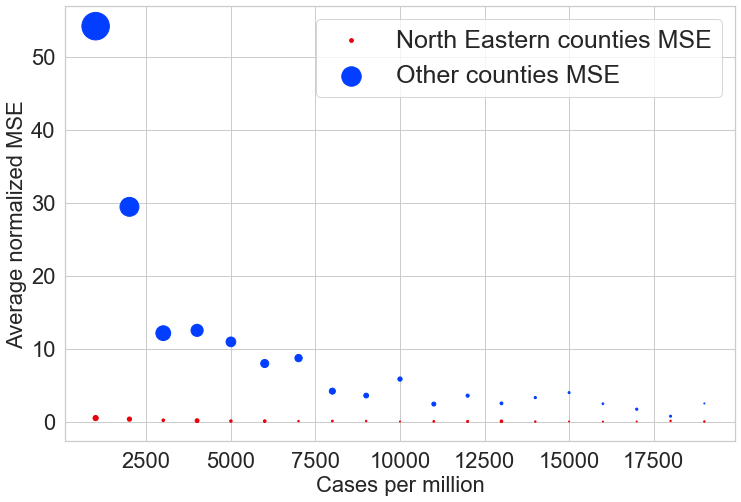

In [145]:
FONTSIZE = 22

fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (12, 8.0)
#plt.scatter(df['days to peak'], (df['peak value']), s=2*df['initial value']),
values = list(donor_diversion.values())
plt.scatter(donor_diversion.keys(), [i[0] for i in values], s = [i[1] for i in values], c = 'r', label = 'North Eastern counties MSE')

values = list(all_diversion.values())
plt.scatter(list(all_diversion.keys()), [i[0] for i in values], s = [i[1] for i in values], label = 'Other counties MSE')
ax.yaxis.get_offset_text().set_fontsize(FONTSIZE)
#plt.ylim([0,1300])
#plt.title('Average diversion for counties with close infection rates using states with bars and restuarants closed as donor pool')
plt.ylabel('Average normalized MSE',fontsize = FONTSIZE)
plt.xlabel('Cases per million',fontsize = FONTSIZE)
plt.legend(fontsize = 25)
#plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=FONTSIZE)
plt.savefig('../Figures/COVID/infections_compare.pdf', bbox_inches='tight')
